In [18]:
# Import packages

In [1]:
# Import system requirements
import sys, os 

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
import random

# Use NetworkX graphic package to create a signed network
import networkx as nx
import math


In [20]:
# import data

In [2]:
# # Import data

# dataset = 'sp100_COVID' # values: 'asset_class','ftse','sectors','sp100'

# os.chdir("../data_modified_recent")

# corr_tensor = np.load('%s_corr.npy' % (dataset)) #list of correlation matrices for each date
# dates = np.load('%s_dates.npy' % (dataset), allow_pickle=True) #list of timestamps
# nodes = np.load('%s_nodes.npy' % (dataset), allow_pickle=True) #list of tickers

# num_examples = corr_tensor.shape[0] #number of dates
# dim = corr_tensor.shape[1] #number of assets

os.chdir("/Users/amine/Dropbox/Amine-CDL(Quantum)/Amine-CDL2020/Hackathon_project/Dwave_CDL_HackathonChallenge_Amine/Code")

sp500_df = pd.read_csv("sp500_COVID_df.csv")
sp500_df.set_index('Date')
sp500_df['COVID_Canada'] 

# for i in range(len(sp500_df['COVID_Canada'])) :
#     if i>2:
#         sp500_df['COVID_Canada'][i]=math.log(sp500_df['COVID_Canada'][i])
            
    
# sp500_df['COVID_Canada']    

0        0.0
1        0.0
2        0.0
3        1.0
4        2.0
5        2.0
6        2.0
7        4.0
8        4.0
9        4.0
10       5.0
11       5.0
12       7.0
13       7.0
14       7.0
15       7.0
16       7.0
17       7.0
18       8.0
19       8.0
20       8.0
21       9.0
22      10.0
23      11.0
24      11.0
25      13.0
26      14.0
27      27.0
28      30.0
29      33.0
30      37.0
31      49.0
32      77.0
33      79.0
34     108.0
35     117.0
36     193.0
37     415.0
38     478.0
39     657.0
40     800.0
41     943.0
42    1470.0
Name: COVID_Canada, dtype: float64

In [3]:
# Import data

# dataset = 'sp100_' # values: 'asset_class','ftse','sectors','sp100'

os.chdir("/Users/amine/Dropbox/Amine-CDL(Quantum)/Amine-CDL2020/Hackathon_project/Dwave_CDL_HackathonChallenge_Amine/Code")

corr_tensor = np.load('sp100_COVID_daily_corr.npy',allow_pickle=True) #list of correlation matrices for each date
dates = np.load('sp100_COVID_daily_dates.npy',allow_pickle=True) #list of timestamps
nodes = np.load('sp100_COVID_daily_nodes.npy',allow_pickle=True) #list of tickers

corr_tensor.shape


(43, 87, 87)

In [4]:
nodes=nodes[15:45]
corr_tensor=corr_tensor[:,15:45,15:45]
num_examples = corr_tensor.shape[0] #number of dates
dim = corr_tensor.shape[1] #number of nodes

In [5]:
# Make the graph and visualize

In [6]:
# Helper Functions

def make_graph(corr_mat, node_labels):

    G = nx.Graph()
    G.add_nodes_from(node_labels)
    dim = corr_mat.shape[0]

    if not dim == len(node_labels):
        raise ValueError('number node labels not = corr matrix dimensions')

    for i in range(dim):
        for j in range(i+1, dim):
            if corr_mat[i,j] != 0.000:
                G.add_edge(node_labels[i], node_labels[j],weight=5)   
    density = (2*G.number_of_edges())/(G.number_of_nodes()*(G.number_of_nodes() - 1))
                
    return G, density

def get_max_deg(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

    return max(degree_sequence)

def clique_size(clique):
    return len(clique)

In [7]:
nodes[7] = 'COVID'
nodes

array(['BMY', 'CAT', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'COVID', 'CSCO',
       'CVS', 'CVX', 'C', 'DHR', 'DIS', 'DUK', 'EMR', 'EXC', 'FB', 'FDX',
       'FOXA', 'FOX', 'F', 'GD', 'GE', 'GILD', 'GM', 'GOOGL', 'GOOG',
       'GS', 'HAL'], dtype=object)

In [10]:
# nx.draw(G)
### this graph is just a snapshot in time
# nx.draw(G,with_labels=True, alpha=0.5, edges=G.edges,  connectionstyle='arc3, rad = 0.1')

def Show_structure_simple_connection(corr_mat, node_labels,graph_number=1):
    ### initialize graph representation
    G=nx.DiGraph()
    ### add nodes in the graph 
    node_color=[]
    node_size=[]

    for node in node_labels:
        
        G.add_node(node,width=0.5,pos=(random.randint(0,800000),random.randint(0,800000)))
        if node == "COVID":
            node_color.append('red')
            node_size.append(500)
        else:
            node_color.append('white')
            node_size.append(100)
            
    dim = len(corr_mat)
    for i in range(dim):
        for j in range(i+1, dim):
            
            ###### So this can be threshold
            #####

            if node_labels[i] == "COVID" or node_labels[j] == "COVID" : 
                if corr_mat[i,j] >= 0.65:
#                     print(corr_mat[i,j])
                    G.add_edge(node_labels[i], node_labels[j],color='green', weight=2)
                if corr_mat[i,j] <= -0.85:
#                     print(corr_mat[i,j])
                    G.add_edge(node_labels[i], node_labels[j],color='red', weight=2)
            else:
                G.add_edge(node_labels[i], node_labels[j],color='grey', weight=0.5)

    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
#     print(colors)
    weights = [G[u][v]['weight'] for u,v in edges]
    pos=nx.get_node_attributes(G,'pos')
#     print(dates[graph_number])
    plt.figure(graph_number)
#     fig,ax = plt.subplots(figsize=(15,10))
    pos = nx.spring_layout(G)
    nx.draw(G,pos, with_labels=True ,node_size=node_size, node_color=node_color, alpha=0.5, edge_color=colors, width=weights, connectionstyle='arc3, rad = 0.1')
    plt.savefig(str(dates[graph_number]) + ' Correlation_to_covid19_spring.pdf')
    plt.show() 
# Show_structure_simple_connection(corr_tensor[0],nodes)

2020-01-22 00:00:00


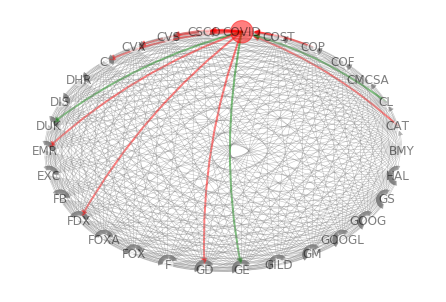

2020-02-05 00:00:00


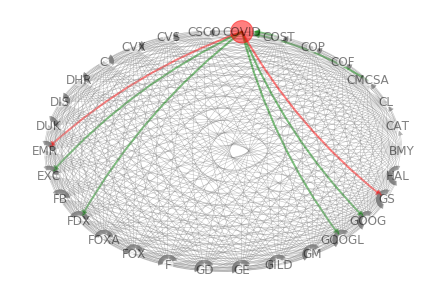

2020-02-20 00:00:00


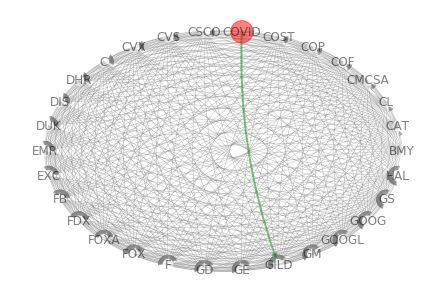

2020-03-05 00:00:00


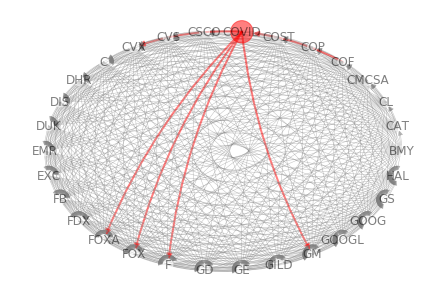

2020-03-19 00:00:00


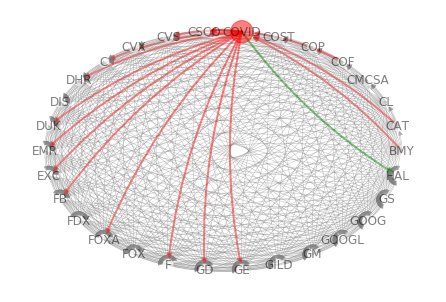

In [9]:
##### Circular
for i in range(0,len(corr_tensor),10):
    print(dates[i])
    Show_structure_simple_connection(corr_tensor[i],nodes,i)

2020-01-22 00:00:00


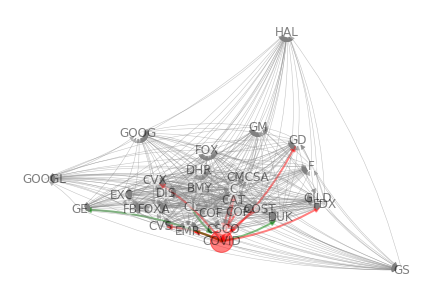

2020-02-05 00:00:00


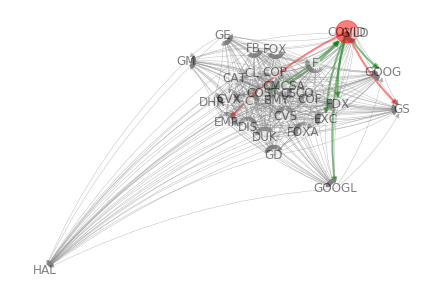

2020-02-20 00:00:00


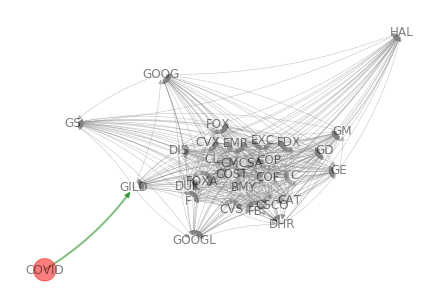

2020-03-05 00:00:00


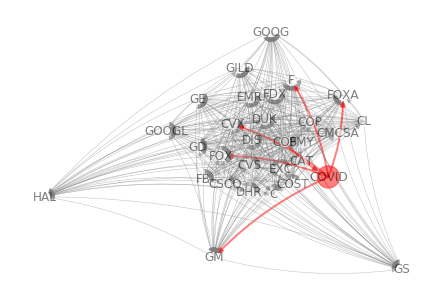

2020-03-19 00:00:00


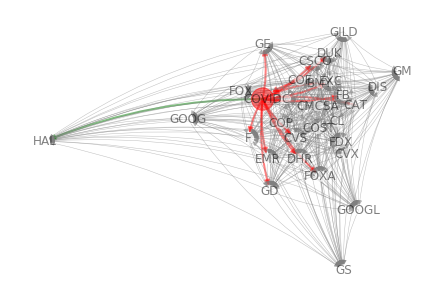

In [11]:
##### Spring
for i in range(0,len(corr_tensor),10):
    print(dates[i])
    Show_structure_simple_connection(corr_tensor[i],nodes,i)

# Max cliques visualizations

In [20]:
# nx.draw(G)
### this graph is just a snapshot in time
# nx.draw(G,with_labels=True, alpha=0.5, edges=G.edges,  connectionstyle='arc3, rad = 0.1')
from networkx.algorithms.approximation.clique import max_clique as class_max_clique

def Show_max_clique(corr_mat, node_labels, graph_number=1):
    ### initialize graph representation
    G=nx.DiGraph()
    ### add nodes in the graph 
    node_color=[]
    node_size=[]
        
    dim = len(corr_mat)
    #### solve for max clique, need a new G(Gsolve) because there is no threshold in corr_mat, so solve 
    #### for max clique in makegraph corr_mat will result in full connection
    Gsolve=nx.DiGraph()
    for node in node_labels:
        Gsolve.add_node(node,width=0.5,pos=(random.randint(0,800000),random.randint(0,800000)))
    for i in range(dim):
        for j in range(i+1, dim):
            if corr_mat[i,j] >= 0.65 or corr_mat[i,j] <= -0.85:
                Gsolve.add_edge(node_labels[i], node_labels[j])
    max_clique=class_max_clique(Gsolve)
#     print(max_clique)
    
    for node in node_labels:
        G.add_node(node,width=0.5,pos=(random.randint(0,800000),random.randint(0,800000)))
        if node == "COVID":
            node_color.append('red')
            node_size.append(400)
        else:
            if node in max_clique:
                node_color.append('orange')
                node_size.append(200)
            else:
                node_color.append('white')
                node_size.append(200)

    for edge in Gsolve.edges():
        if edge[0] == "COVID" or edge[1] == "COVID":
#             print(edge[1])
            if corr_mat[i,j] >= 0.65:
    #                     print(corr_mat[i,j])
                G.add_edge(edge[0], edge[1],color='green', weight=10)
            if corr_mat[i,j] <= -0.85:
    #                     print(corr_mat[i,j])
                G.add_edge(edge[0], edge[1],color='red', weight=10)
        if edge[0] in max_clique and edge[1] in max_clique:
            G.add_edge(edge[0], edge[1],color='blue', weight=2)

        else:
            G.add_edge(edge[0], edge[1],color='grey', weight=0.5)
            
            
    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
#     print(colors)
    weights = [G[u][v]['weight'] for u,v in edges]
    pos=nx.get_node_attributes(G,'pos')
#     print(dates[graph_number])
    plt.figure(graph_number)
#     fig,ax = plt.subplots(figsize=(15,10))
    pos = nx.shell_layout(G)
    nx.draw(G,pos, with_labels=True ,node_size=node_size, node_color=node_color, alpha=0.5, edge_color=colors, width=weights, connectionstyle='arc3, rad = 0.1')
    plt.savefig(str(dates[graph_number]) + ' MaxClique_shell_covid_5.pdf')
    plt.show() 


In [43]:
########## https://networkx.github.io/documentation/stable/_modules/networkx/drawing/layout.html 

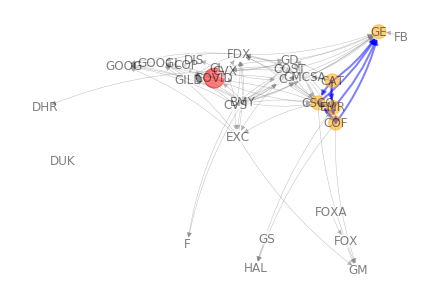

In [18]:
#### here we choose time slice 0 with corr_tensor[0]
Show_max_clique(corr_tensor[5],nodes)

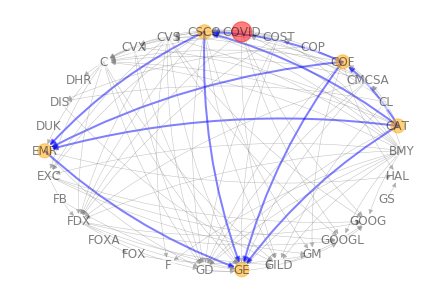

In [21]:
#### here we choose time slice 3 with corr_tensor[0]
Show_max_clique(corr_tensor[5],nodes)

# Now we move to Max clique optimization

In [22]:
# Import system requirements
import sys, os

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
from pytz import UTC
#from icalendar import UTC


# DWave Credentials
dwave_solver = os.getenv('D-Wave 2000Q')
# dwave_solver = os.getenv('DW_2000Q_6')
### copy your own token
api_key = os.getenv('CDL0-7ae9bc75ae606545ecd057dbd298a57ce0a72478')

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

import dwave_networkx as dnx

# Use NetworkX graphic package to create a signed network
import networkx as nx

# Select a D-Wave system and handle mapping from problem graph to sampler graph
sampler = EmbeddingComposite(DWaveSampler(solver=dwave_solver, token=api_key))

In [61]:
# # Import data

# dataset = 'sp100' # values: 'asset_class','ftse','sectors','sp100'

# os.chdir("../data_modified")

# corr_tensor = np.load('%s_corr.npy' % (dataset)) #list of correlation matrices for each date
# dates = np.load('%s_dates.npy' % (dataset)) #list of timestamps
# nodes = np.load('%s_nodes.npy' % (dataset)) #list of tickers

# num_examples = corr_tensor.shape[0] #number of dates
# dim = corr_tensor.shape[1] #number of assets

# #load max clique computation
# max_clique_list = np.load("max_clique_list")
# max_clique_list

In [12]:
# Helper Functions

def make_graph(corr_mat, node_labels, graph_type):

    G = nx.Graph()
    G.add_nodes_from(node_labels)
    dim = corr_mat.shape[0]

    if not dim == len(node_labels):
        raise ValueError('number node labels not = corr matrix dimensions')

    if graph_type=='signed':
        for i in range(dim):
            for j in range(i+1, dim):
                if corr_mat[i,j] < 0:
                    G.add_edge(node_labels[i], node_labels[j], sign=-1)
                elif corr_mat[i,j] > 0:
                    G.add_edge(node_labels[i], node_labels[j], sign=1)
    
    if graph_type=='corr':
        for i in range(dim):
            for j in range(i+1, dim):
                if corr_mat[i,j] != 0.000:
                    G.add_edge(node_labels[i], node_labels[j])
    
    if graph_type=='uncorr':
        for i in range(dim):
            for j in range(i+1, dim):
                if corr_mat[i,j] == 0.000:
                    G.add_edge(node_labels[i], node_labels[j])
    
    density = (2*G.number_of_edges())/(G.number_of_nodes()*(G.number_of_nodes() - 1))
                
    return G, density

def get_max_deg(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

    return max(degree_sequence)

def clique_size(clique):
    return len(clique)

In [13]:
print("num examples: %d, matrix dim: %d" % (num_examples, dim))

num examples: 43, matrix dim: 30


# Dwave and Classical

In [15]:
# source code for DWave max clique algorithm - modified to include timing

from __future__ import division
import networkx as nx
import dwave_networkx as dnx
from dwave_networkx.utils import binary_quadratic_model_sampler


### give us max clique in the graph
def maximum_clique(G, sampler=None, lagrange=2.0, **sampler_args):
  
    if G is None:
        raise ValueError("Expected NetworkX graph!")

    # finding the maximum clique in a graph is equivalent to finding
    # the independent set in the complementary graph
    complement_G = nx.complement(G)
    return maximum_independent_set(complement_G, sampler, lagrange, **sampler_args)


def clique_number(G, sampler=None, lagrange=2.0, **sampler_args):
    
    return len(maximum_clique(G, sampler, lagrange, **sampler_args))


def is_clique(G, clique_nodes):

    for x in clique_nodes:
        for y in clique_nodes:
            if x != y:
                if not(G.has_edge(x,y)):
                    return False
    return True


def maximum_weighted_independent_set(G, weight=None, sampler=None, lagrange=2.0, **sampler_args):

    # Get a QUBO representation of the problem
    Q = maximum_weighted_independent_set_qubo(G, weight, lagrange)

    # use the sampler to find low energy states
    response = sampler.sample_qubo(Q, **sampler_args) #this is where the optimization happens
    computation_time = response.info['timing']['qpu_access_time'] / 10**6 #compute qpu access time, and convert to seconds 
    # we want the lowest energy sample
    sample = next(iter(response))

    # nodes that are spin up or true are exactly the ones in S.
    return [node for node in sample if sample[node] > 0], computation_time


def maximum_independent_set(G, sampler=None, lagrange=2.0, **sampler_args):

    return maximum_weighted_independent_set(G, None, sampler, lagrange, **sampler_args)


def is_independent_set(G, indep_nodes):

    return len(G.subgraph(indep_nodes).edges) == 0


def maximum_weighted_independent_set_qubo(G, weight=None, lagrange=2.0):
    
    if not G:
        return {}

    cost = dict(G.nodes(data=weight, default=1))
    scale = max(cost.values())
    Q = {(node, node): min(-cost[node] / scale, 0.0) for node in G}
    Q.update({edge: lagrange for edge in G.edges})

    return Q


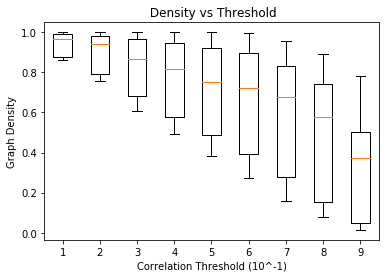

In [17]:
# Plot graph density for each threshold

thresh_array = []
density_distr = []

for i in np.arange(0.1, 1, 0.1):
    density_array = []
    for j in range(1, int(num_examples/3)):
        corr_mat = corr_tensor[j*3, :, :].copy()
        corr_mat[(corr_mat > -1*i) & (corr_mat < i)] = 0
        G, density = make_graph(corr_mat, nodes, 'corr')
        
        density_array.append(density)
    
    density_distr.append(density_array)
    
plt.boxplot(density_distr)
plt.ylabel("Graph Density")
plt.xlabel("Correlation Threshold (10^-1)")
plt.title(" Density vs Threshold")
plt.show()

In [ ]:
#### checking whether it will work by one slice

In [19]:
corr_mat = corr_tensor[int(num_examples/2), :, :].copy() #take the correlation matrix for a specific date (for visualization)
corr_mat[(corr_mat > -1*0.3) & (corr_mat < 0.3)] = 0 #arbitrary threshold, for visualization purposes
G, density = make_graph(corr_mat, nodes, 'corr')

In [20]:
from networkx.algorithms.approximation.clique import max_clique as class_max_clique
class_max_clique(G)

{'BMY',
 'C',
 'CAT',
 'CL',
 'CMCSA',
 'COF',
 'COP',
 'COST',
 'CSCO',
 'CVS',
 'CVX',
 'DHR',
 'DIS',
 'DUK',
 'EMR',
 'EXC',
 'F',
 'FB',
 'FOX',
 'FOXA',
 'GD',
 'GE',
 'GM',
 'GOOG',
 'GOOGL',
 'GS'}

In [23]:
# import plotly
# import plotly.graph_objects as go


# pos = nx.spring_layout(G)
# nx.set_node_attributes(G, pos, 'pos')

# edge_x = []
# edge_y = []
# for edge in G.edges():
#     x0, y0 = G.nodes[edge[0]]['pos']
#     x1, y1 = G.nodes[edge[1]]['pos']
#     edge_x.append(x0)
#     edge_x.append(x1)
#     edge_x.append(None)
#     edge_y.append(y0)
#     edge_y.append(y1)
#     edge_y.append(None)

# edge_trace = go.Scatter(
#     x=edge_x, y=edge_y,
#     line=dict(width=0.5, color='#888'),
#     hoverinfo='none',
#     mode='lines')

# node_x = []
# node_y = []

# node_annotations = []

# for node in G.nodes():
#     x, y = G.nodes[node]['pos']
#     node_x.append(x)
#     node_y.append(y)
    
#     node_annotations.append(
#         dict(text=node,
#              showarrow=False,
#              xref="x", yref="y",
#              x=x, y=y,
#             font=dict(color='red', size=5)))



# node_trace = go.Scatter(
#     x=node_x, y=node_y,
#     mode='markers',
#     hoverinfo='text',
#     marker=dict(
#         showscale=True,
#         # colorscale options
#         #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
#         #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
#         #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
#         colorscale='YlGnBu',
#         reversescale=True,
#         color=[],
#         size=20,
#         colorbar=dict(
#             thickness=15,
#             title='Node Connections',
#             xanchor='left',
#             titleside='right'
#         ),
#         line_width=2))

# node_adjacencies = []
# node_text = []

# for node, adjacencies in enumerate(G.adjacency()):
#     node_adjacencies.append(len(adjacencies[1]))
#     node_text.append('# of connections: '+str(len(adjacencies[1])))
    
    
    

# node_trace.marker.color = node_adjacencies
# node_trace.text = node_text



# fig = go.Figure(data=[edge_trace, node_trace],
#              layout=go.Layout(
#                 showlegend=False,
#                 hovermode='closest',
#                 margin=dict(b=20,l=5,r=5,t=40),
#                 annotations=node_annotations,
#                 xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#                 yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
#                 )

# fig.show()

In [23]:
# Ensure DWave algorithm is working (just a test for one date)
max_clique, timing = maximum_clique(G, sampler)
valid_soln = dnx.is_clique(G, max_clique)

assert len(max_clique) > 0
dnx.is_clique(G, max_clique)

True

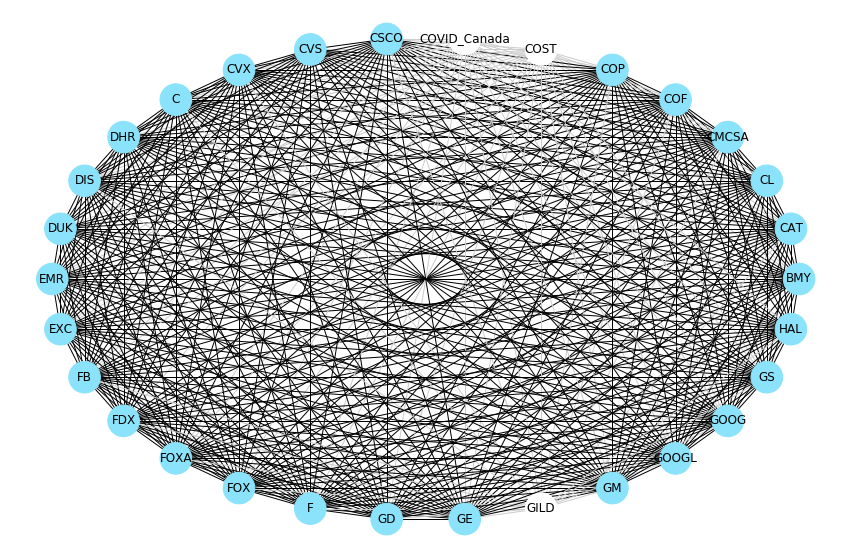

In [24]:
# # Draw solution
node_coloring = []
for node in G.nodes():
    if node in max_clique:
        node_coloring.append("#8ae3fa")
    else:
        node_coloring.append("white")

edge_coloring = []

for edge in G.edges():
    if edge[0] in max_clique and edge[1] in max_clique:
        edge_coloring.append("black")
    else:
        edge_coloring.append("#cccccc")

fig,ax = plt.subplots(figsize=(15,10))
nx.draw_shell(G, ax=ax, with_labels=True, node_size=1000,  node_color=node_coloring, edge_color=edge_coloring)

# get the result data for Quantum 

In [25]:
# Create graph for each month and calculate max clique. 

clique_array = []
valid_clique_array = []
clique_size_array = []
date_array = []
density_array = []
threshold_array = []
time_array = []

count = 0 #count to keep track of progress when running
for i in np.arange(0.1, 1, 0.1):
    for j in range(1, int(num_examples/5)): #division by 5 is just to speed up this for-loop, not necessary to have every month
        
        corr_mat = corr_tensor[j*5, :, :].copy()
        corr_mat[(corr_mat > -1*i) & (corr_mat < i)] = 0
        
        G, density = make_graph(corr_mat, nodes, 'corr')
        
        count += 1
        if count % 10 == 0: print("count: %d" % (count))
        
        try:
            opt_clique, comp_time = maximum_clique(G, sampler)
            max_clique_size = len(opt_clique)
            valid_clique = dnx.is_clique(G, opt_clique)
            
            for k in range(3): #try a few more times to increase likelihood of getting valid clique and good clique size
                max_clique, comp_time_temp = maximum_clique(G, sampler)
                clique_size = len(max_clique)
                valid_clique = dnx.is_clique(G, max_clique)
                
                if valid_clique and clique_size > max_clique_size:
                    opt_clique = max_clique
                    max_clique_size = clique_size
                    comp_time = comp_time_temp
                
        except Exception as err:
            print(err)
            print("No embedding found for threshold %f and matrix %d" % (i, j*5))
        else: 
            clique_array.append(opt_clique)
            valid_clique_array.append(valid_clique)
            clique_size_array.append(max_clique_size)
            time_array.append(comp_time)
            threshold_array.append(i)
            density_array.append(density)
            date_array.append(dates[j*5])

count: 10
count: 20
count: 30
count: 40
count: 50
count: 60


In [ ]:
# time_array

In [27]:
assert len(clique_array) == len(date_array) == len(density_array) == len(threshold_array) == len(clique_size_array) == len(time_array)

In [28]:
# Create Pandas DataFrame for quantum results
# os.chdir("../result_files")

pd.DataFrame(data={"date": date_array, "threshold": threshold_array, "density": density_array,
                "max_clique": clique_array, "clique_size": clique_size_array, 
                "valid_clique": valid_clique_array, "computation_time": time_array}).to_csv("maxclique_quant_res.csv")

# Networkx max clique Algo

In [29]:
# Run classical max clique algm on the matrices that ran successfully above
from networkx.algorithms.approximation.clique import max_clique as class_max_clique

clique_array = []
valid_clique_array = []
clique_size_array = []
density_array = []
time_array = []

for i in range(len(threshold_array)):
    
    # get threshold and matrix idx 
    thresh = threshold_array[i]
    idx = dates.tolist().index(date_array[i])
    
    corr_mat = corr_tensor[idx, :, :].copy()
    corr_mat[(corr_mat > -1*thresh) & (corr_mat < thresh)] = 0

    G, density = make_graph(corr_mat, nodes, 'corr')

    try:
        t = time.clock()
        max_clique = class_max_clique(G)
        elapsed = time.clock() - t
        valid_clique = dnx.is_clique(G, max_clique)
    except Exception as err:
        print(err)
        print("Error on matrix %d with threshold %f" % (j*5, i))
    else:
        
        clique_array.append(max_clique)
        valid_clique_array.append(valid_clique)
        clique_size_array.append(len(max_clique))
        time_array.append(elapsed)
        density_array.append(density)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [31]:
time_array

[0.03632899999996653,
 0.034556000000009135,
 0.0669870000000401,
 0.07461099999994758,
 0.06094799999999623,
 0.0832529999999565,
 0.061136000000033164,
 0.03323199999999815,
 0.02825999999998885,
 0.06217700000001969,
 0.0645860000000198,
 0.04805199999998422,
 0.0512740000000349,
 0.043594999999982065,
 0.037364999999965676,
 0.03283199999998487,
 0.10228899999998475,
 0.09263599999997041,
 0.06742399999995996,
 0.09163100000000668,
 0.07074000000000069,
 0.0331740000000309,
 0.028271999999958553,
 0.10471699999999373,
 0.09014400000000933,
 0.0715940000000046,
 0.07926700000001574,
 0.0513440000000287,
 0.02634499999999207,
 0.02794099999999844,
 0.10552599999999757,
 0.08386900000004971,
 0.07478899999995292,
 0.09123799999997573,
 0.04617999999999256,
 0.02579800000000887,
 0.026030999999989035,
 0.09309799999999768,
 0.07844499999998789,
 0.07867000000004509,
 0.0913150000000087,
 0.0504579999999919,
 0.026575000000036653,
 0.028507000000047356,
 0.10351600000001326,
 0.06784999

In [247]:
assert len(clique_array) == len(date_array) == len(density_array) == len(threshold_array) == len(clique_size_array) == len(time_array)

In [32]:
# Create Pandas DataFrame for class results
pd.DataFrame(data={"date": date_array, "threshold": threshold_array, "density": density_array,
                "max_clique": clique_array, "clique_size": clique_size_array, 
                "valid_clique": valid_clique_array, "computation_time": time_array}).to_csv("maxclique_class_res.csv")

# SA for max_clique 

In [33]:
import neal
solver = neal.SimulatedAnnealingSampler()

def maximum_clique(G, sampler=None, lagrange=2.0, **sampler_args):
  
    if G is None:
        raise ValueError("Expected NetworkX graph!")

    # finding the maximum clique in a graph is equivalent to finding
    # the independent set in the complementary graph
    complement_G = nx.complement(G)
    return maximum_independent_set(complement_G, sampler, lagrange, **sampler_args)


def clique_number(G, sampler=None, lagrange=2.0, **sampler_args):
    
    return len(maximum_clique(G, sampler, lagrange, **sampler_args))


def is_clique(G, clique_nodes):

    for x in clique_nodes:
        for y in clique_nodes:
            if x != y:
                if not(G.has_edge(x,y)):
                    return False
    return True


def maximum_weighted_independent_set(G, weight=None, sampler=None, lagrange=2.0, **sampler_args):

    # Get a QUBO representation of the problem
    Q = maximum_weighted_independent_set_qubo(G, weight, lagrange)

    # use the sampler to find low energy states
    response = sampler.sample_qubo(Q, **sampler_args) #this is where the optimization happens
    # we want the lowest energy sample
    sample = next(iter(response))

    # nodes that are spin up or true are exactly the ones in S.
    return [node for node in sample if sample[node] > 0]


def maximum_independent_set(G, sampler=None, lagrange=2.0, **sampler_args):

    return maximum_weighted_independent_set(G, None, sampler, lagrange, **sampler_args)


def is_independent_set(G, indep_nodes):

    return len(G.subgraph(indep_nodes).edges) == 0


def maximum_weighted_independent_set_qubo(G, weight=None, lagrange=2.0):
    
    if not G:
        return {}

    cost = dict(G.nodes(data=weight, default=1))
    scale = max(cost.values())
    Q = {(node, node): min(-cost[node] / scale, 0.0) for node in G}
    Q.update({edge: lagrange for edge in G.edges})

    return Q


In [34]:
#SA 

clique_array = []
valid_clique_array = []
clique_size_array = []
density_array = []
time_array = []

for i in range(len(threshold_array)):
    
    # get threshold and matrix idx 
    thresh = threshold_array[i]
    idx = dates.tolist().index(date_array[i])
    
    corr_mat = corr_tensor[idx, :, :].copy()
    corr_mat[(corr_mat > -1*thresh) & (corr_mat < thresh)] = 0

    G, density = make_graph(corr_mat, nodes, 'corr')

    try:
        t = time.clock()
        max_clique = maximum_clique(G, sampler=solver, lagrange=2.0)
        elapsed = time.clock() - t
        valid_clique = dnx.is_clique(G, max_clique)
    except Exception as err:
        print(err)
        print("Error on matrix %d with threshold %f" % (j*5, i))
    else:
        
        clique_array.append(max_clique)
        valid_clique_array.append(valid_clique)
        clique_size_array.append(len(max_clique))
        time_array.append(elapsed)
        density_array.append(density)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [35]:
time_array

[0.00997300000000223,
 0.00681600000001481,
 0.003684000000021115,
 0.00516400000003614,
 0.007519999999999527,
 0.004518000000018674,
 0.007308000000023185,
 0.008453000000031352,
 0.006937000000050375,
 0.0067020000000184154,
 0.003053000000022621,
 0.0039899999999875035,
 0.0038919999999507127,
 0.004087000000026819,
 0.010001999999985856,
 0.01028999999999769,
 0.004794000000003962,
 0.0032820000000128857,
 0.00823400000001584,
 0.00458400000002257,
 0.00980200000003606,
 0.011822000000051958,
 0.011791000000016538,
 0.003930999999965934,
 0.00533300000000736,
 0.006824999999992087,
 0.006219999999984793,
 0.007697000000007392,
 0.010871000000008735,
 0.01353599999998778,
 0.005180000000052587,
 0.006003999999961707,
 0.00808399999999665,
 0.006343000000015309,
 0.008828999999991538,
 0.01083699999998089,
 0.016031999999995605,
 0.003857999999979711,
 0.0060579999999959,
 0.006409999999959837,
 0.0039059999999722095,
 0.007518000000004577,
 0.011299999999948795,
 0.0145219999999994

In [36]:
# Create Pandas DataFrame for SA results
pd.DataFrame(data={"date": date_array, "threshold": threshold_array, "density": density_array,
                "max_clique": clique_array, "clique_size": clique_size_array, 
                "valid_clique": valid_clique_array, "computation_time": time_array}).to_csv("maxclique_SA_res.csv")

# Plot 

In [ ]:
# import os, sys

In [27]:
# Import libraries and dataframes
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# dataset = "sp100" # Values: asset_class, sectors, ftse

quant_res_df = pd.read_csv("maxclique_quant_res.csv")
class_res_df = pd.read_csv("maxclique_class_res.csv")
SA_res_df = pd.read_csv("maxclique_SA_res.csv")

quant_res_df = quant_res_df.drop(axis=1, columns=['Unnamed: 0'])
class_res_df = class_res_df.drop(axis=1, columns=['Unnamed: 0'])
SA_res_df = SA_res_df.drop(axis=1, columns=['Unnamed: 0'])

In [28]:
assert quant_res_df.shape == class_res_df.shape == SA_res_df.shape and quant_res_df.columns.equals(class_res_df.columns) and quant_res_df.columns.equals(SA_res_df.columns) 

# plot for Clique Size vs. Date

<Figure size 432x288 with 0 Axes>

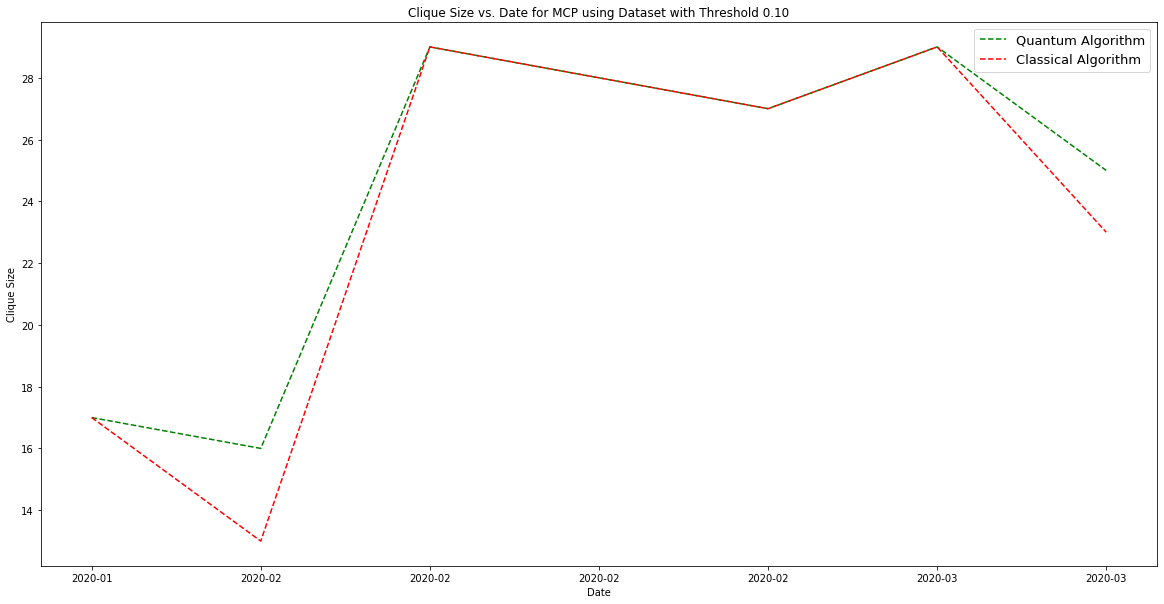

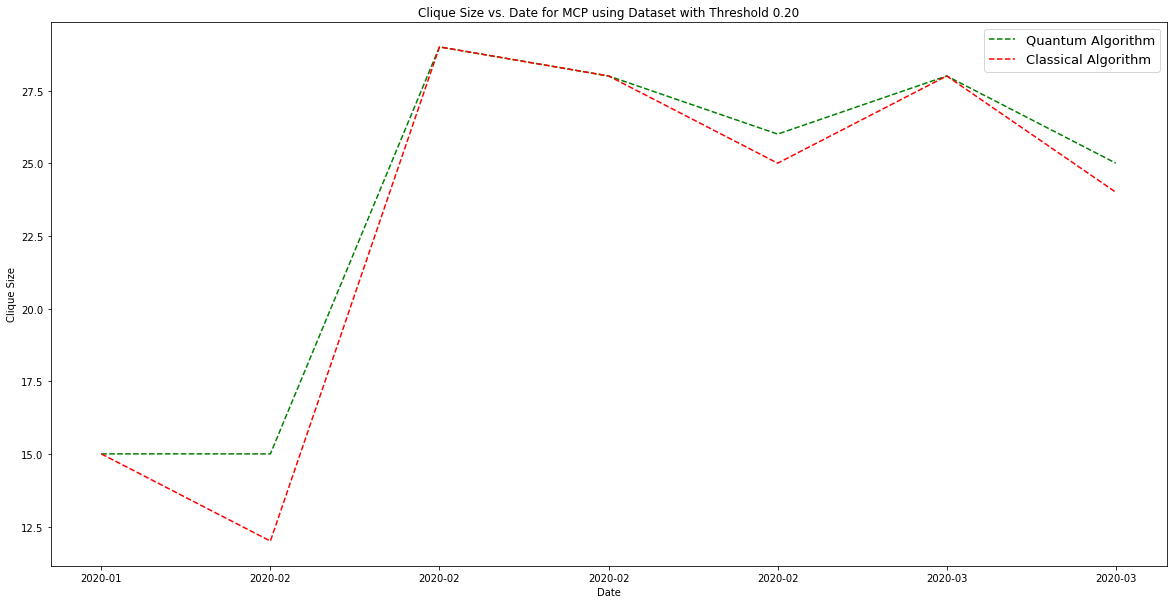

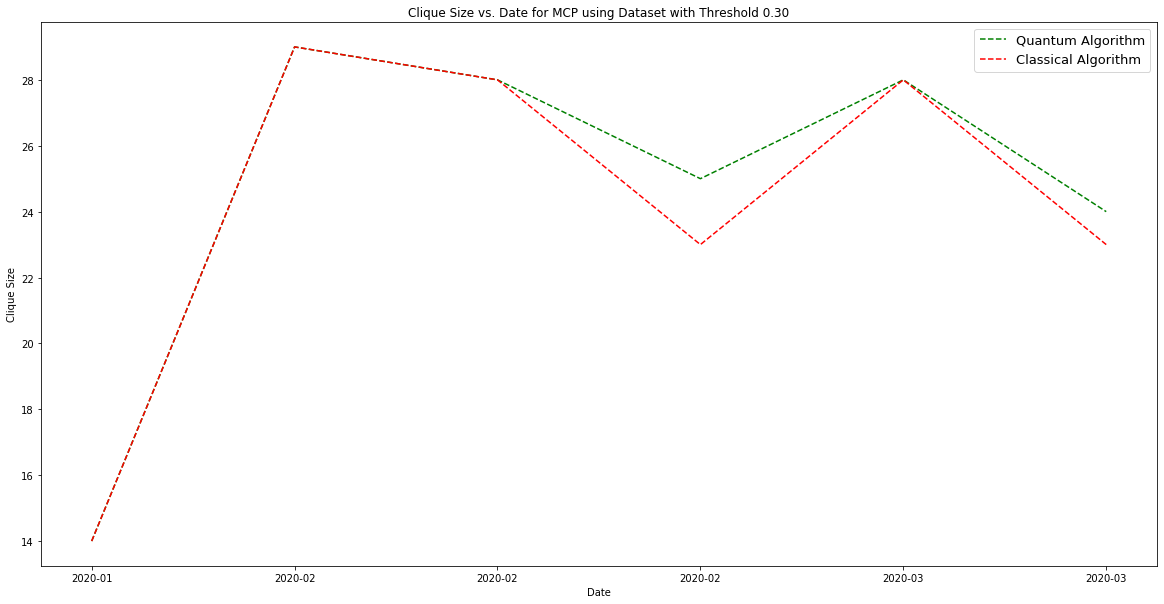

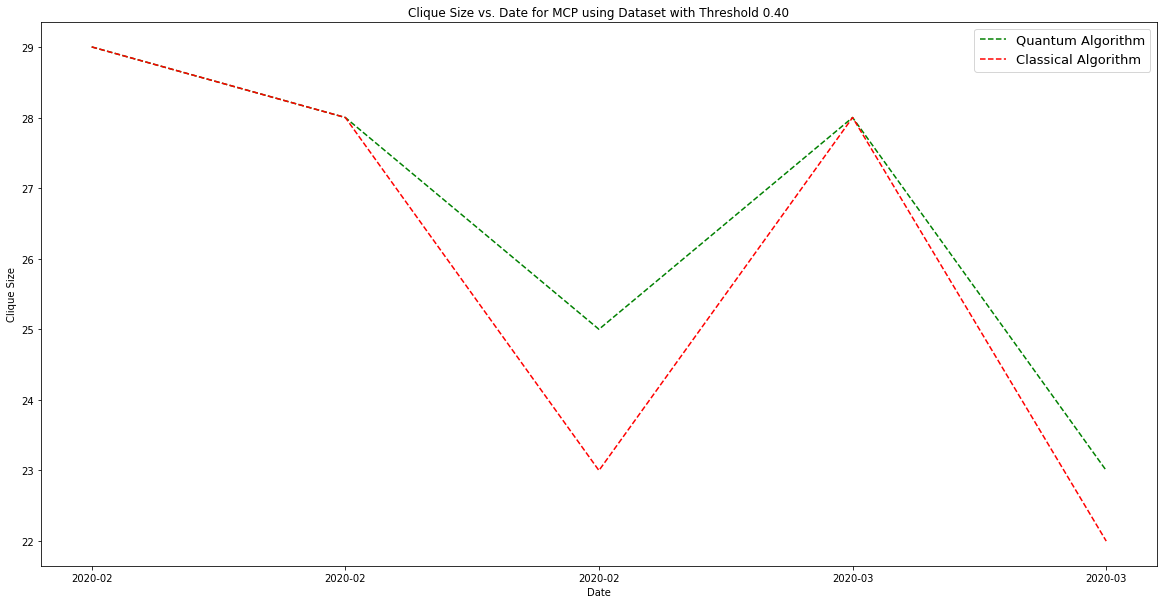

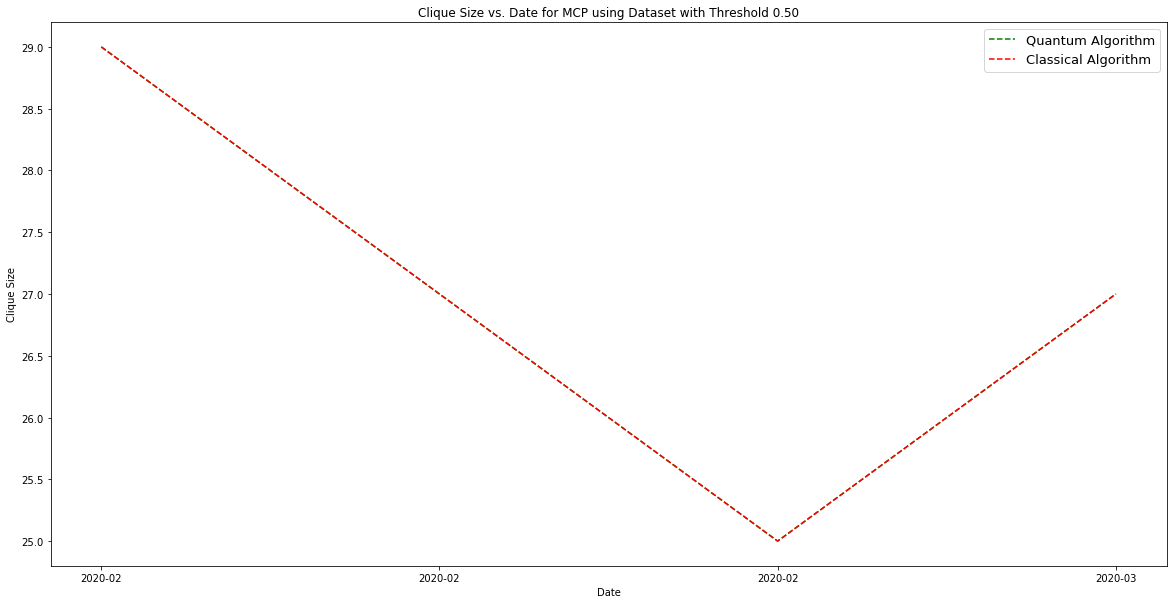

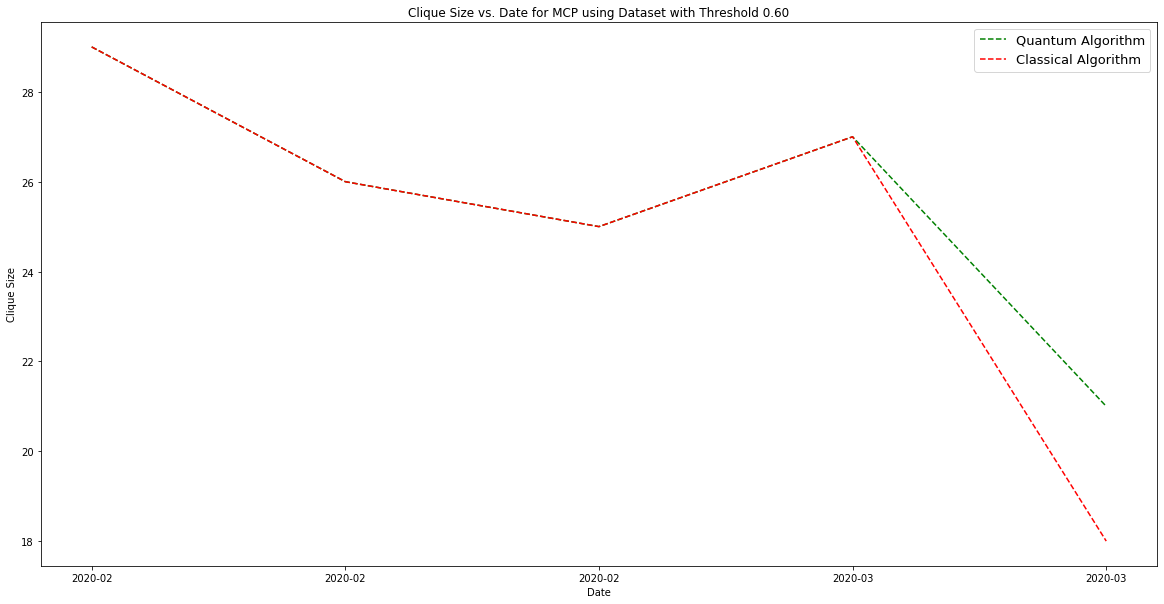

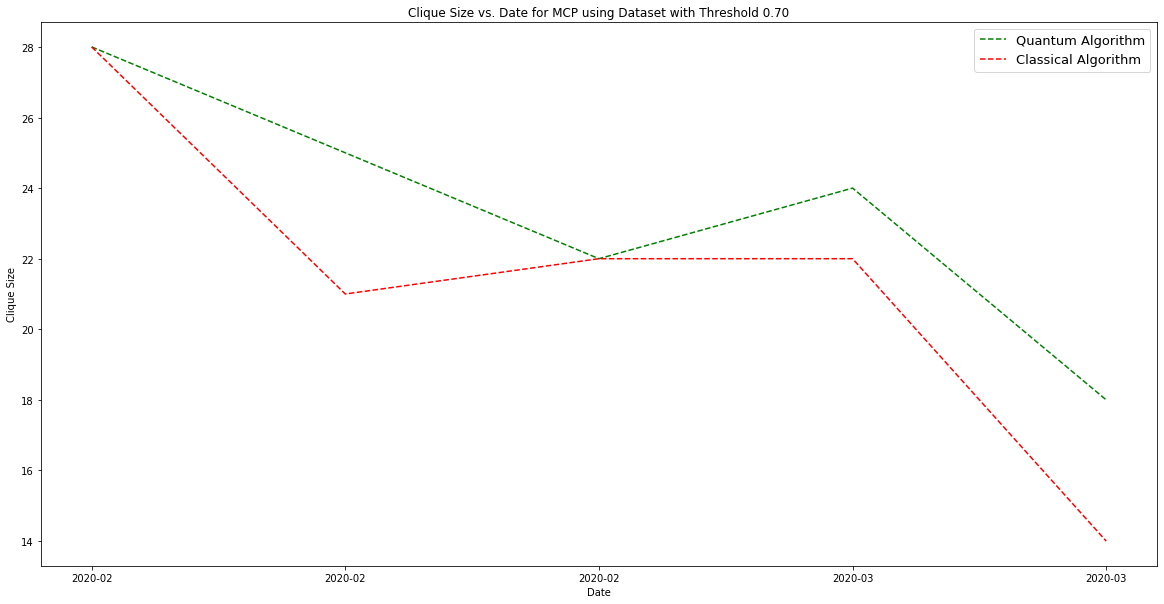

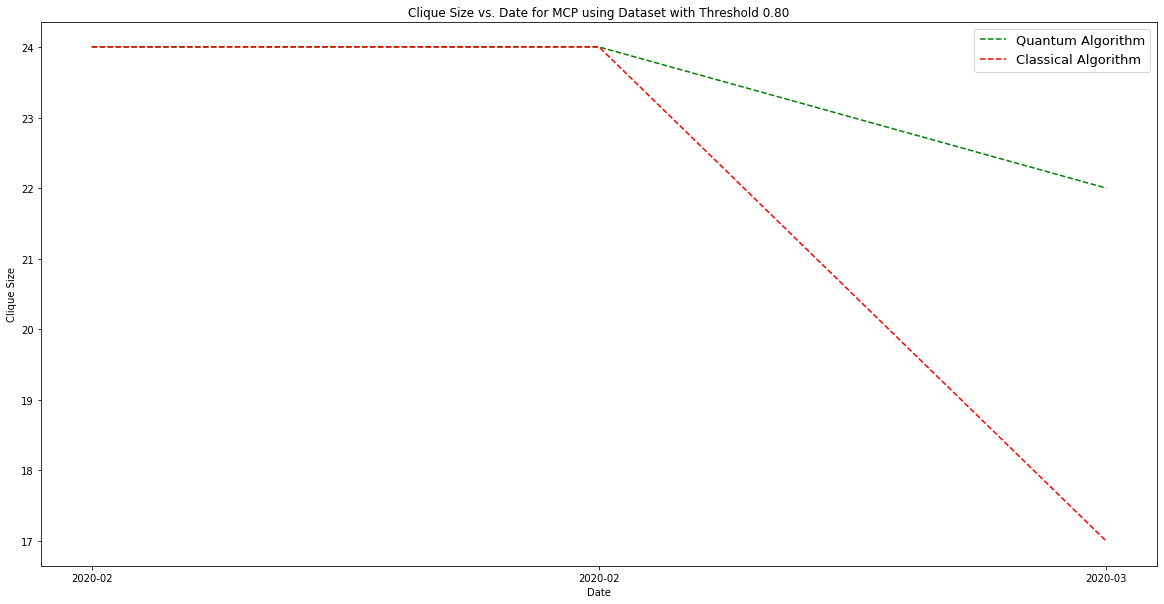

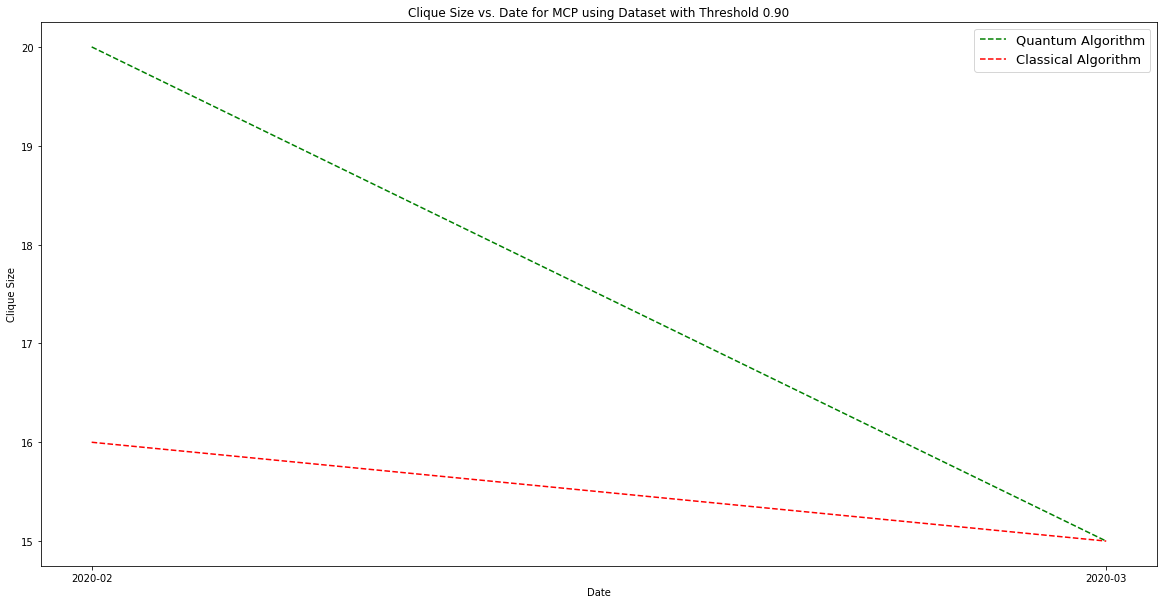

In [30]:
# Plot score vs time for each threshold
thresholds = quant_res_df['threshold'].unique()

i = 1
for thresh in thresholds:
    quant_series = quant_res_df[(quant_res_df.threshold == thresh) & 
                                (quant_res_df.valid_clique == True)]
    class_series = class_res_df[(class_res_df.threshold == thresh) & 
                                (class_res_df.valid_clique == True)]
# #     SA_series = SA_res_df[(SA_res_df.threshold == thresh) & 
#                             (SA_res_df.valid_clique == True)]
    
    
    class_series = class_series[class_series['date'].isin(quant_series['date'])]
    
    
#     assert quant_series.shape == class_series.shape == SA_series.shape
    assert quant_series.shape == class_series.shape 
    
    fig = plt.figure(i)
    plt.subplots(figsize=(20,10))
    

    plt.title('Clique Size vs. Date for MCP using Dataset with Threshold %.2f' % (thresh))
    plt.ylabel('Clique Size')
    plt.xlabel('Date')
    
    plt.plot(quant_series["date"], quant_series['clique_size'], 'g--', label='Quantum Algorithm')
    plt.plot(quant_series["date"], class_series['clique_size'], 'r--', label='Classical Algorithm')
#     plt.plot(quant_series["date"], SA_series['clique_size'], 'r--', label='SA Algorithm')
    plt.legend(loc=0, prop={'size': 13})
    plt.xticks(ticks=quant_series['date'][::], 
              labels=[x[0:7] for x in quant_series['date']])
    plt.savefig('Clique_size plot with ' + str(round(thresh,1))+ '.pdf')
    i=i+1

# Plot  Graph Density vs. Date

<Figure size 432x288 with 0 Axes>

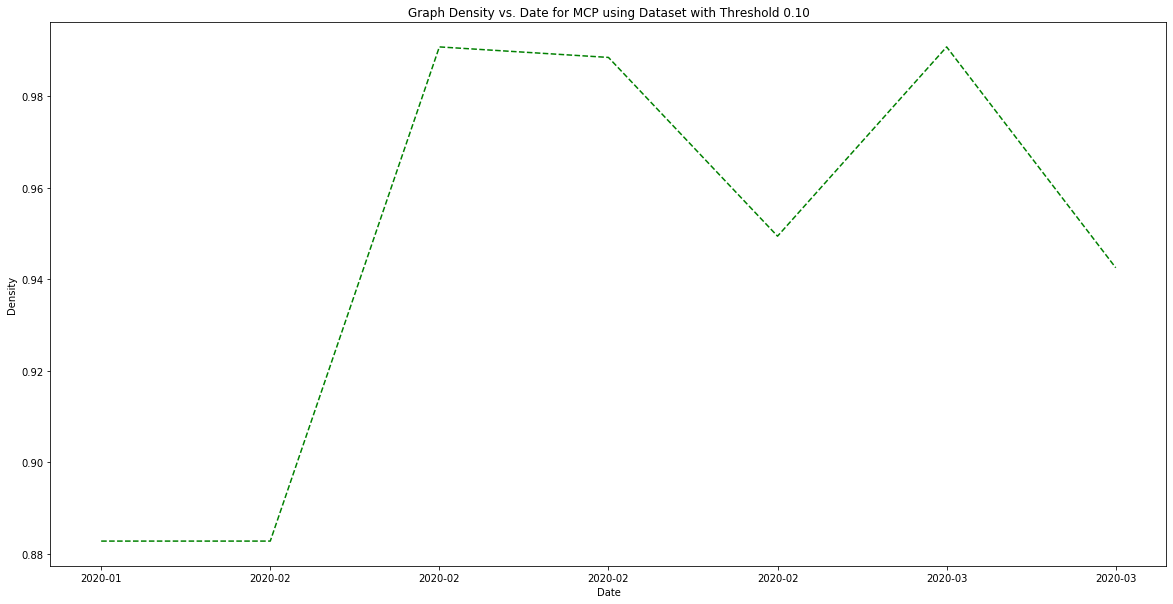

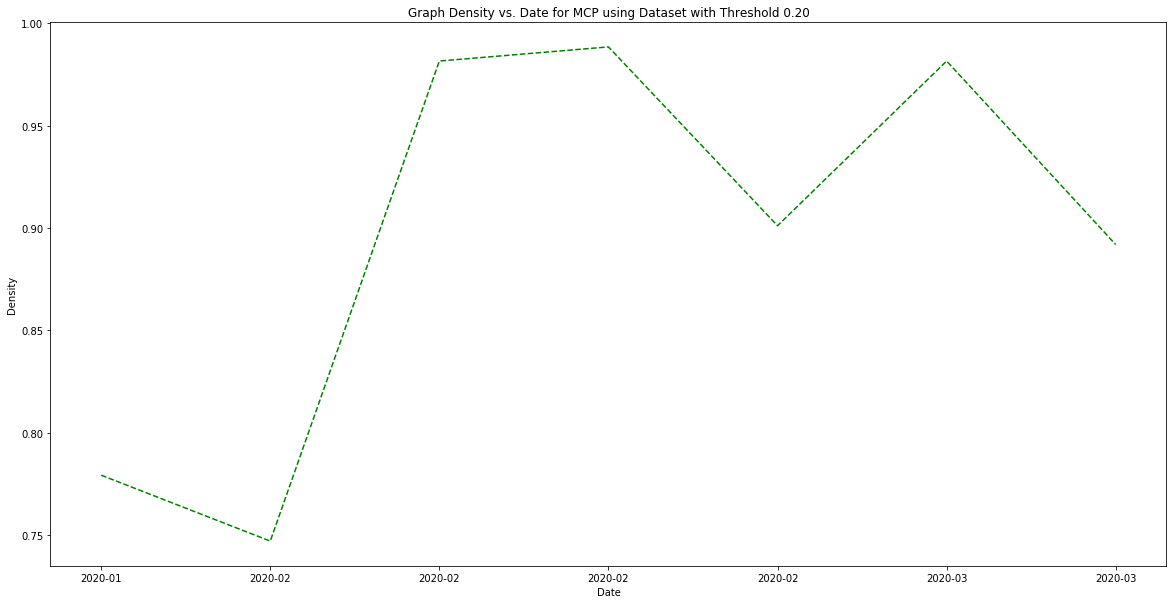

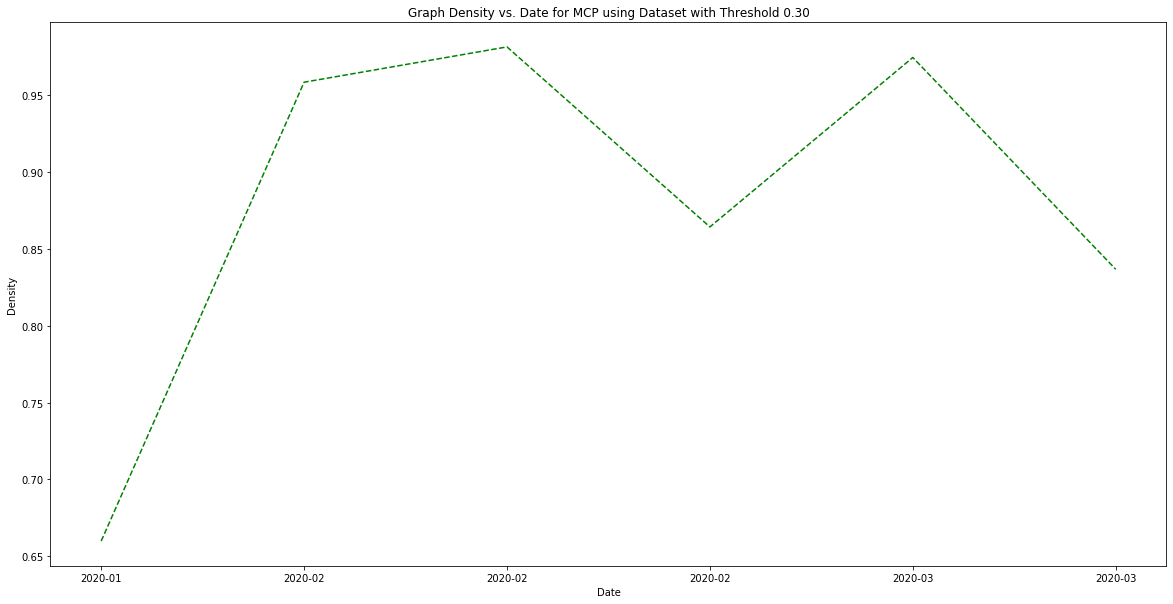

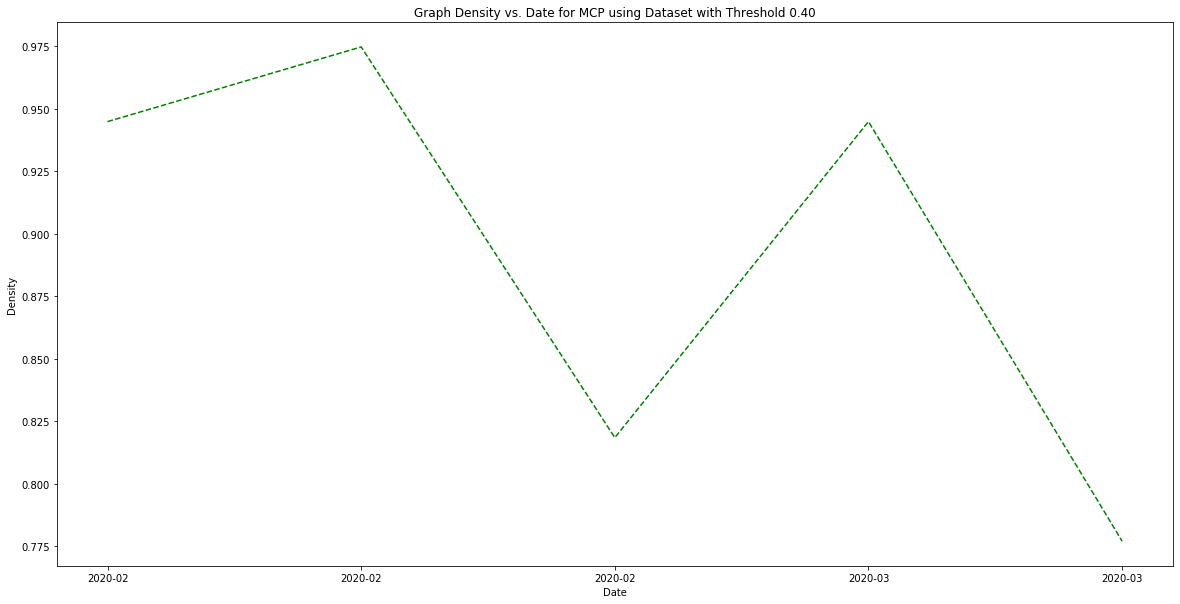

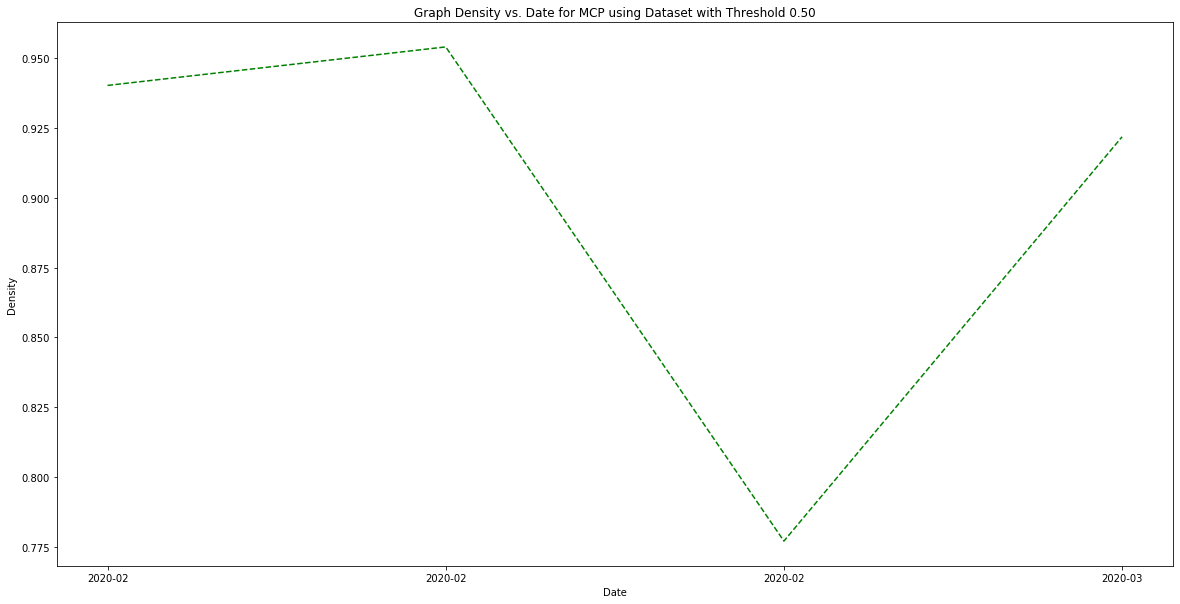

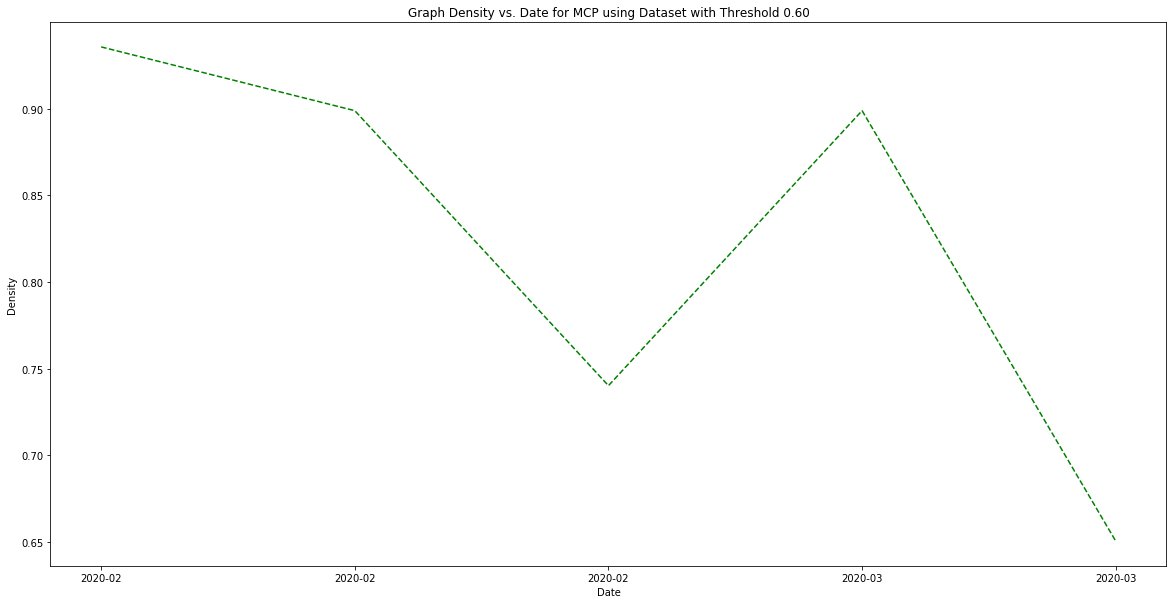

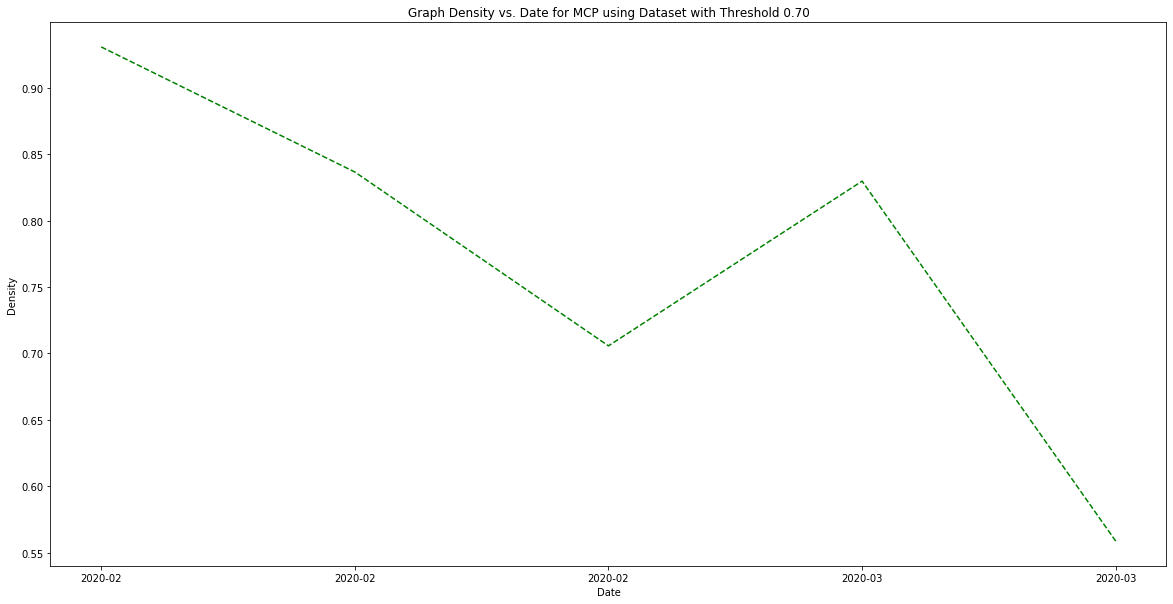

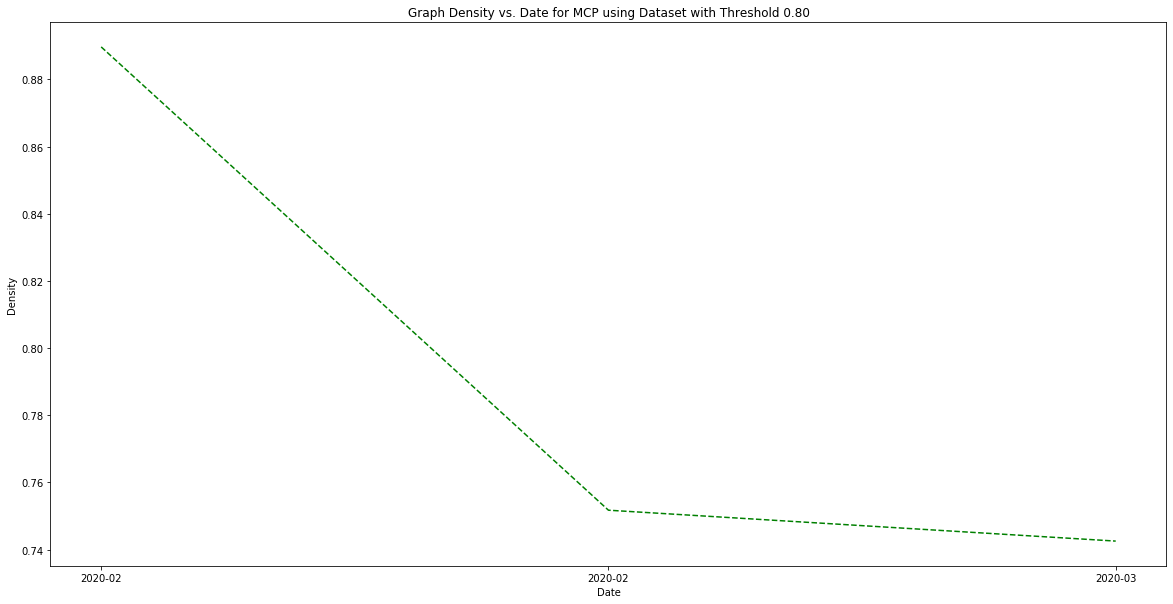

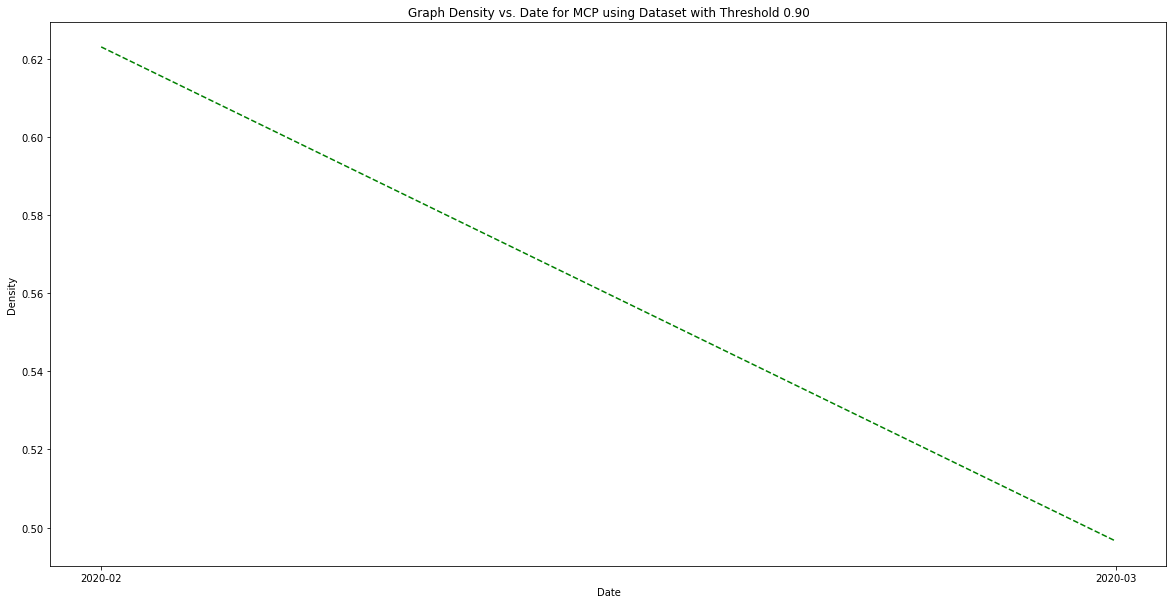

In [32]:
# Plot score vs time for each threshold
thresholds = quant_res_df['threshold'].unique()

i = 1
for thresh in thresholds:
    quant_series = quant_res_df[(quant_res_df.threshold == thresh) & 
                                (quant_res_df.valid_clique == True)]
    class_series = class_res_df[(class_res_df.threshold == thresh) & 
                                (class_res_df.valid_clique == True)]
# #     SA_series = SA_res_df[(SA_res_df.threshold == thresh) & 
#                             (SA_res_df.valid_clique == True)]
    
    
    class_series = class_series[class_series['date'].isin(quant_series['date'])]
    
    
#     assert quant_series.shape == class_series.shape == SA_series.shape
    assert quant_series.shape == class_series.shape 
    
    fig = plt.figure(i)
    plt.subplots(figsize=(20,10))
    

    plt.title('Graph Density vs. Date for MCP using Dataset with Threshold %.2f' % (thresh))
    plt.plot(quant_series['date'], quant_series['density'], 'g--')
#     plt.plot(quant_series['date'], class_series['density'], 'r--')
#     plt.legend(loc=0, prop={'size': 13})
    plt.xticks(ticks=quant_series['date'][::], 
              labels=[x[0:7] for x in quant_series['date']])
    plt.ylabel("Density")
    plt.xlabel("Date")
    plt.savefig('Graph Density plot with ' + str(round(thresh,1))+ '.pdf')
    
    i += 1

# Plot Computational Time vs Date

<Figure size 432x288 with 0 Axes>

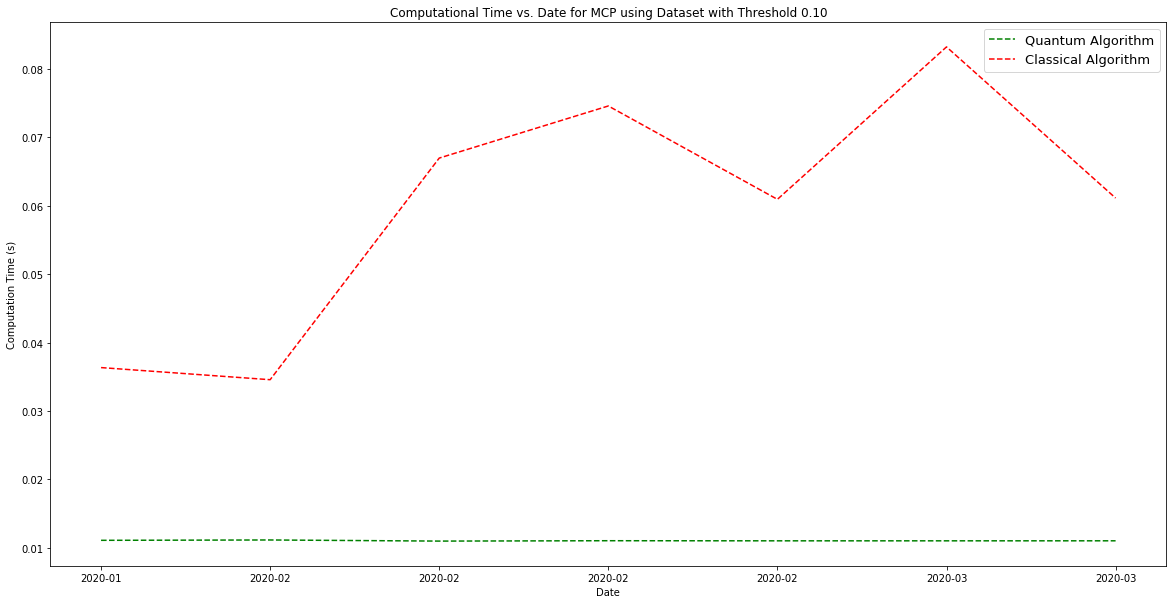

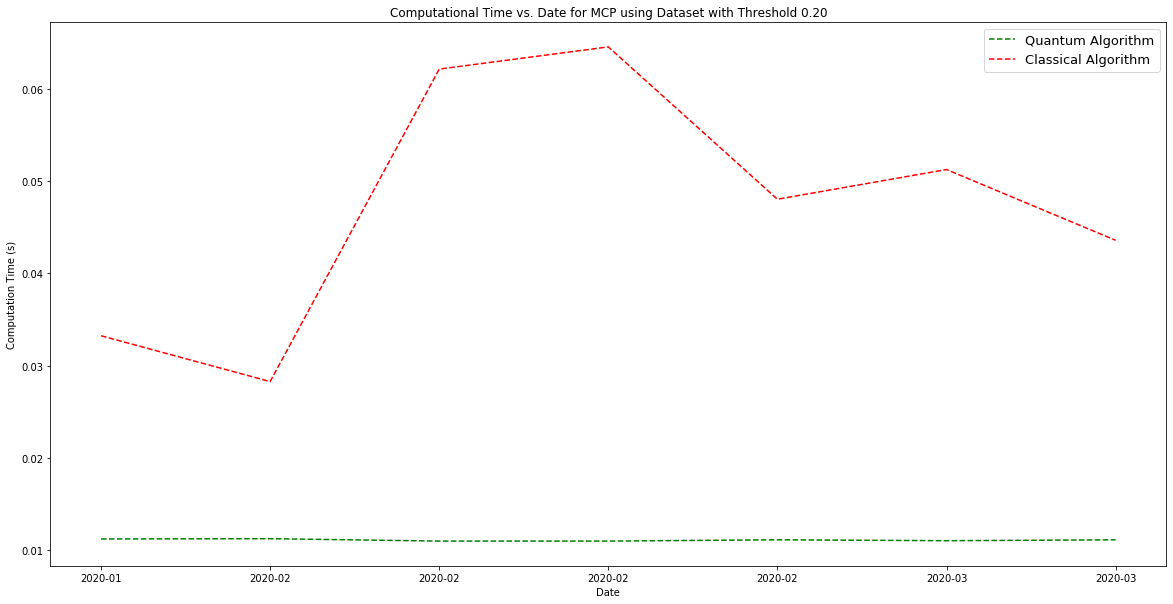

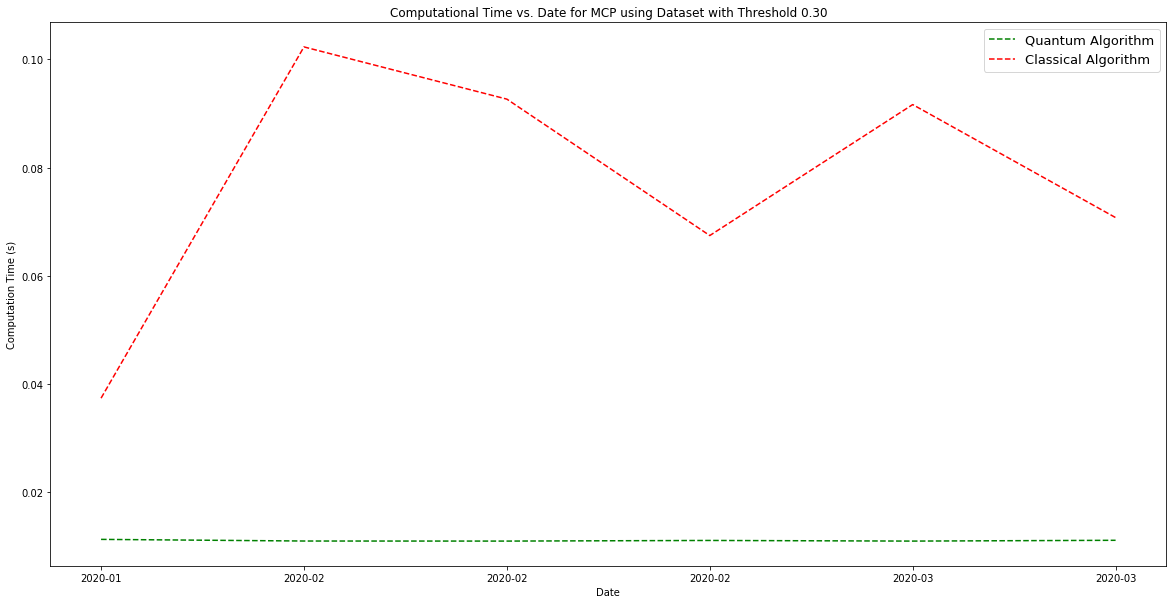

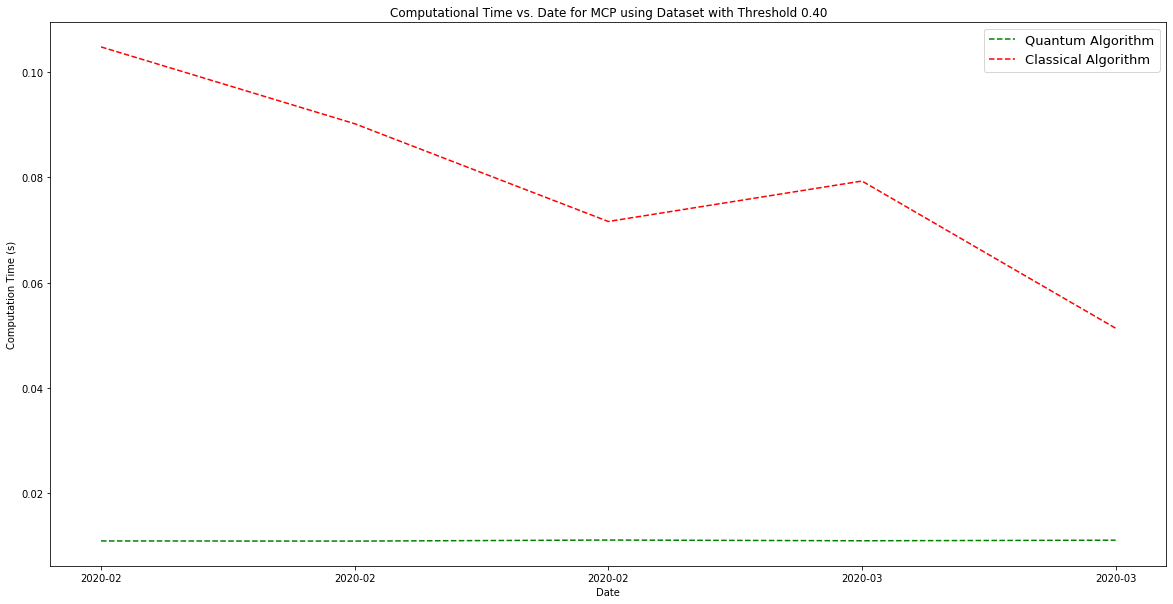

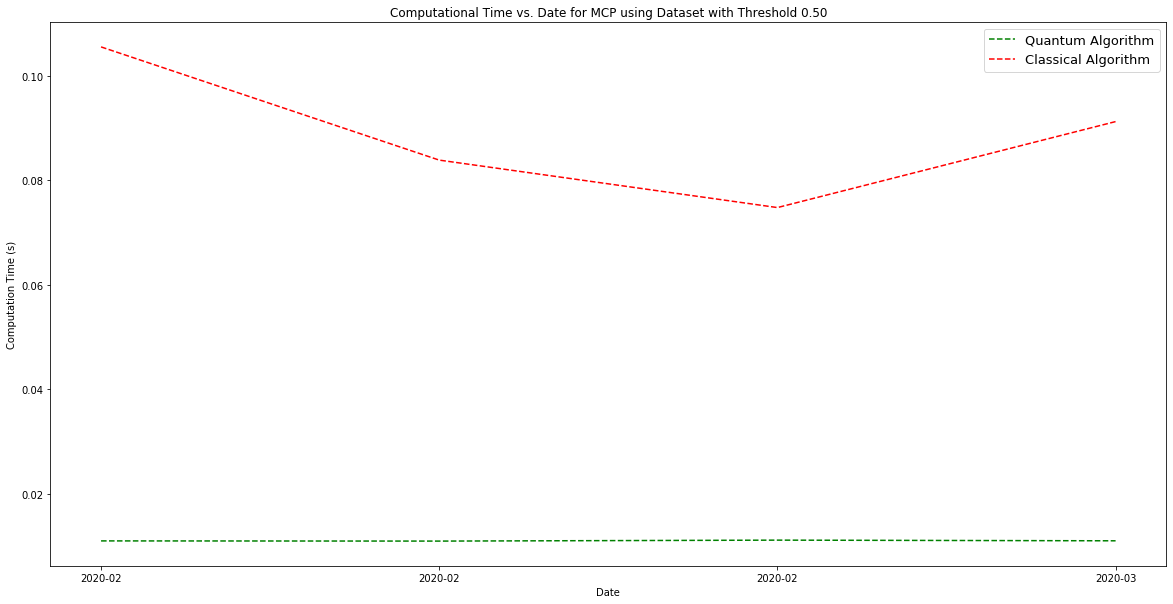

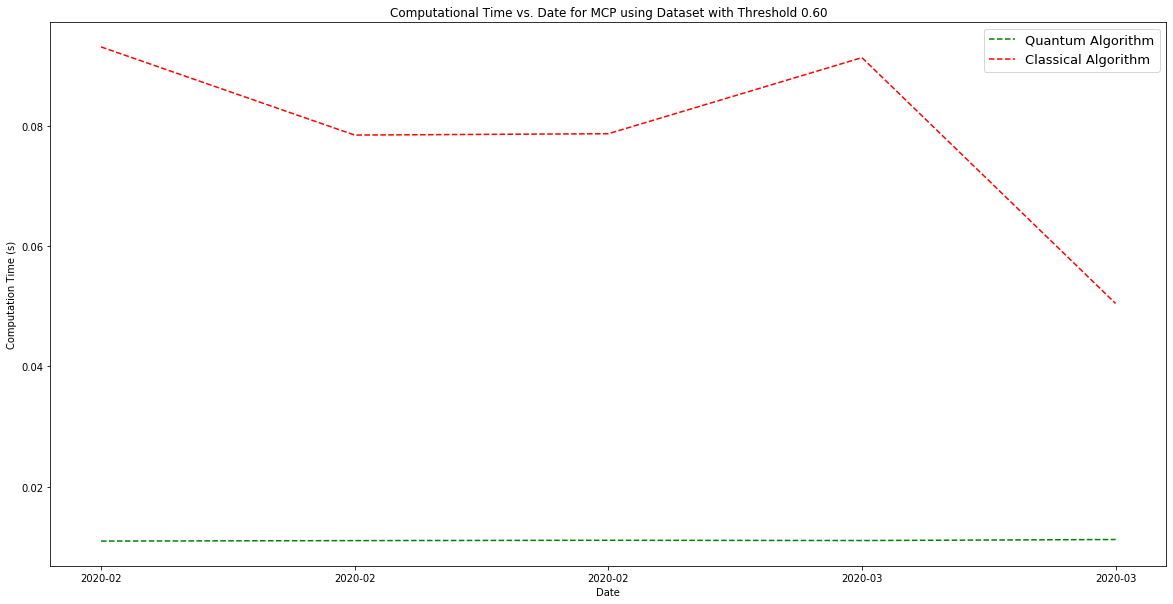

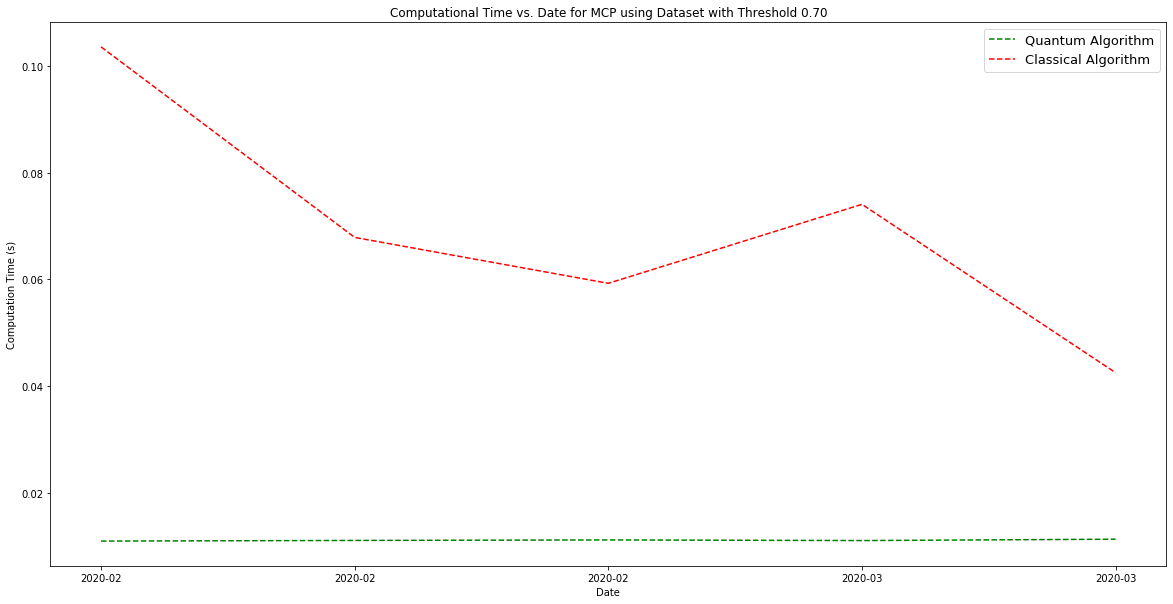

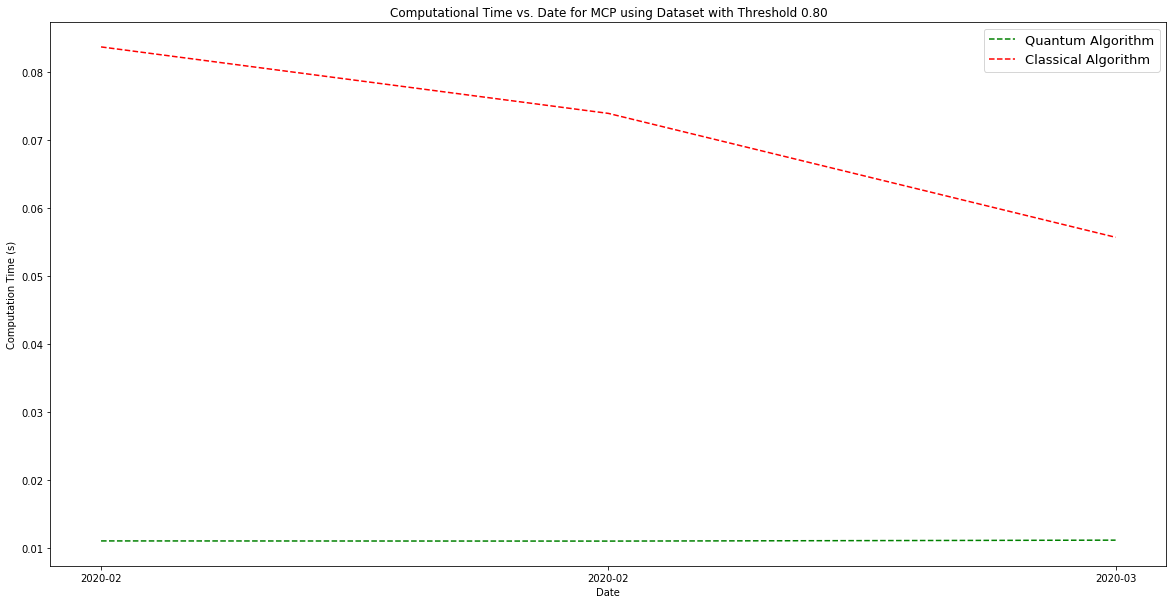

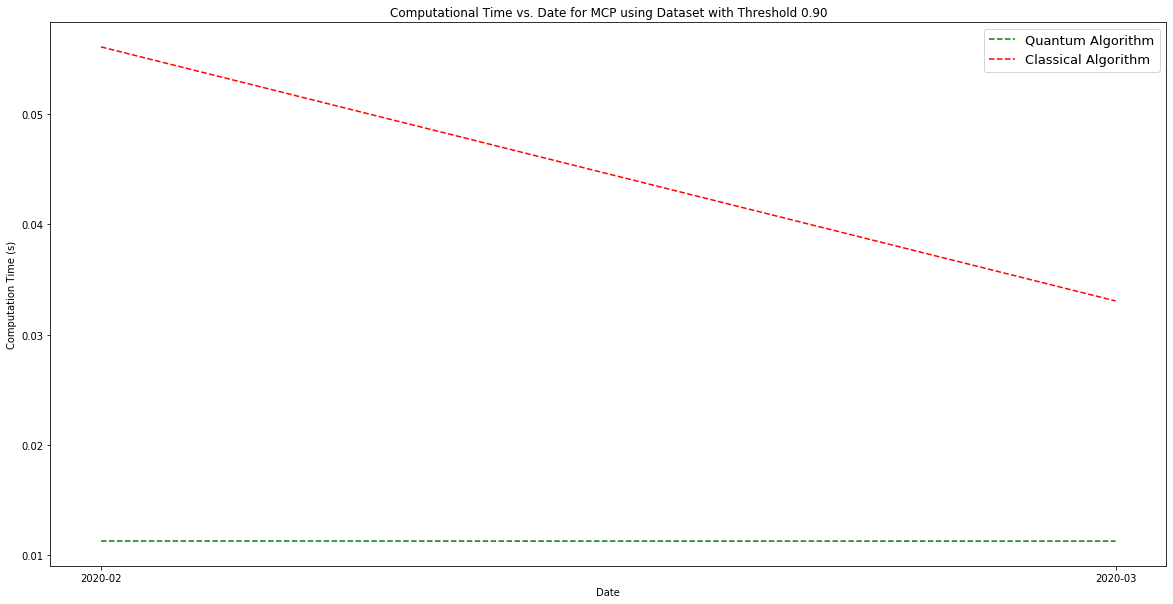

In [31]:
# Plot score vs time for each threshold
thresholds = quant_res_df['threshold'].unique()

i = 1
for thresh in thresholds:
    quant_series = quant_res_df[(quant_res_df.threshold == thresh) & 
                                (quant_res_df.valid_clique == True)]
    class_series = class_res_df[(class_res_df.threshold == thresh) & 
                                (class_res_df.valid_clique == True)]
# #     SA_series = SA_res_df[(SA_res_df.threshold == thresh) & 
#                             (SA_res_df.valid_clique == True)]
    
    
    class_series = class_series[class_series['date'].isin(quant_series['date'])]
    
    
#     assert quant_series.shape == class_series.shape == SA_series.shape
    assert quant_series.shape == class_series.shape 
    
    fig = plt.figure(i)
    plt.subplots(figsize=(20,10))

    plt.title('Computational Time vs. Date for MCP using Dataset with Threshold %.2f' % (thresh))
    plt.ylabel('Computation Time (s)')
    plt.xlabel('Date')
    
    plt.plot(quant_series["date"], quant_series['computation_time'], 'g--', label='Quantum Algorithm')
    plt.plot(quant_series["date"], class_series['computation_time'], 'r--', label='Classical Algorithm')
#     plt.plot(quant_series["date"], SA_series['computation_time'], 'r--', label='SA Algorithm')
    
    plt.legend(loc=0, prop={'size': 13})
    plt.xticks(ticks=quant_series['date'][::], 
              labels=[x[0:7] for x in quant_series['date']])
    plt.savefig('Computational Time vs. Date plot with ' + str(round(thresh,1)) + '.pdf')
    
    i += 1

# Plot everyting at once

<Figure size 432x288 with 0 Axes>

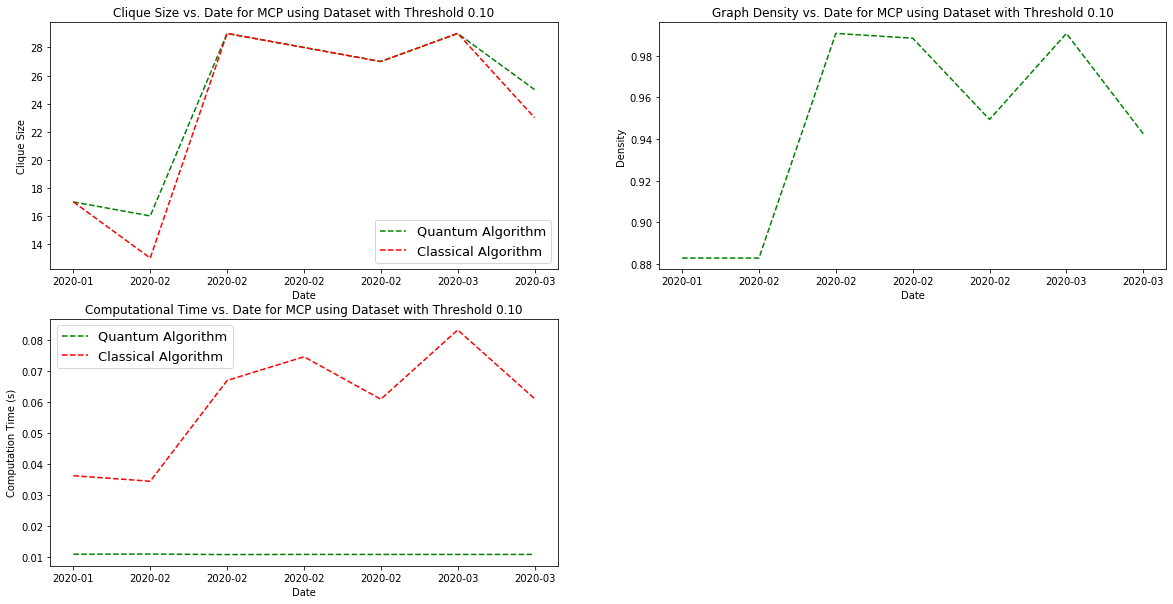

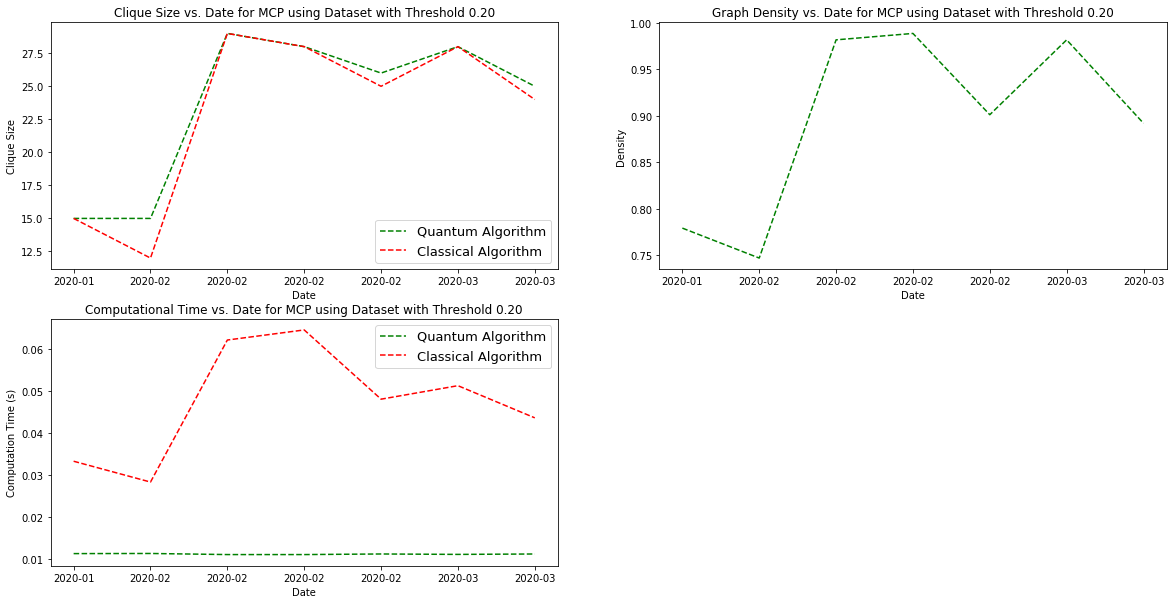

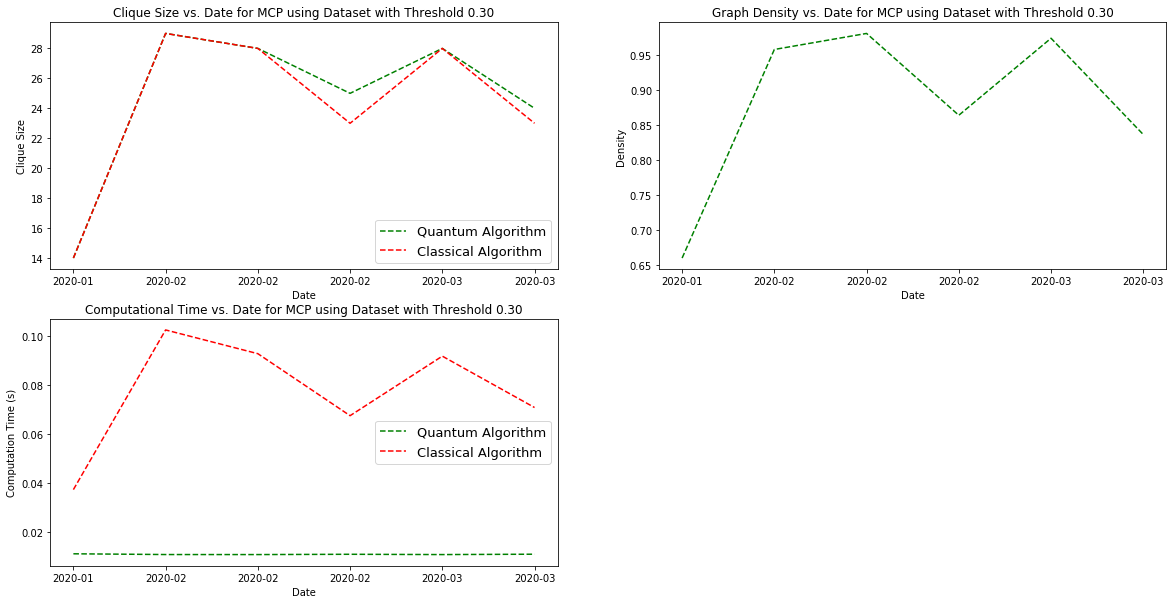

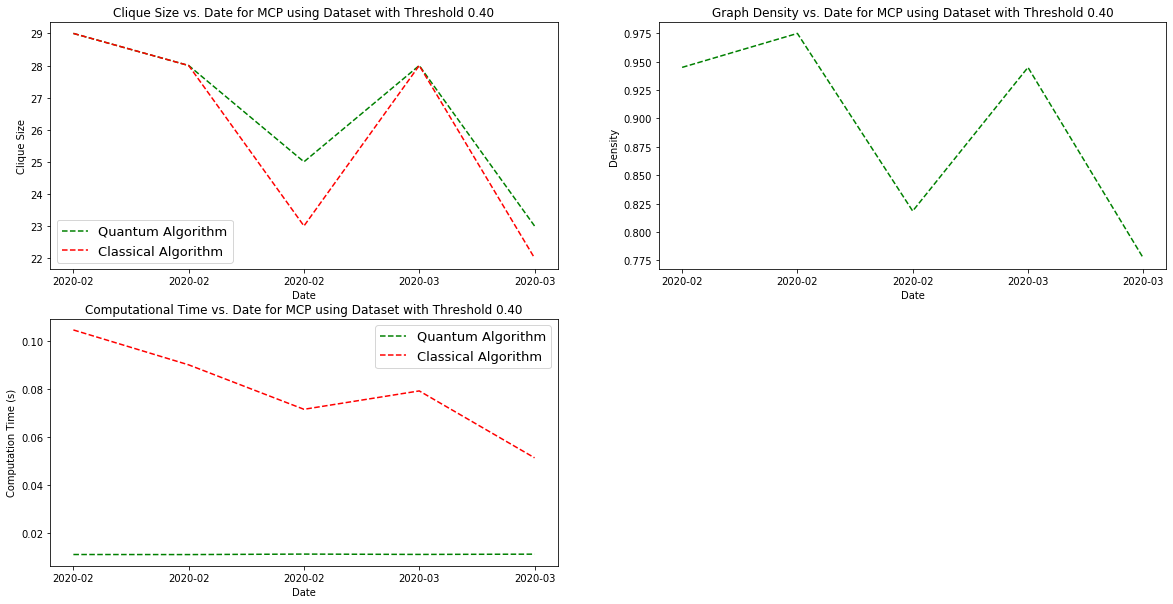

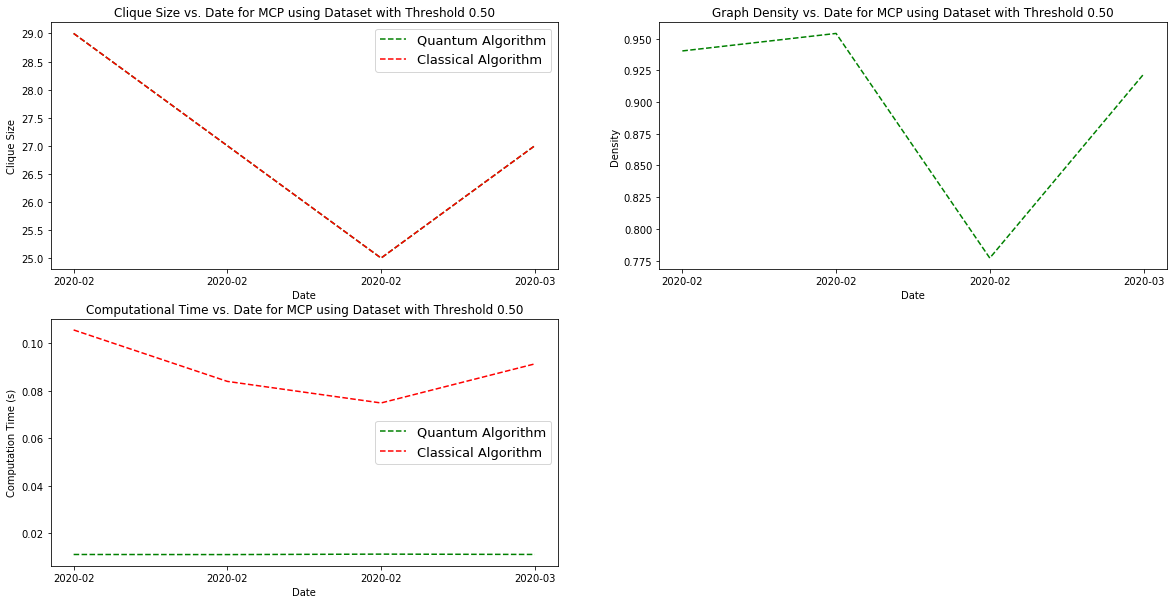

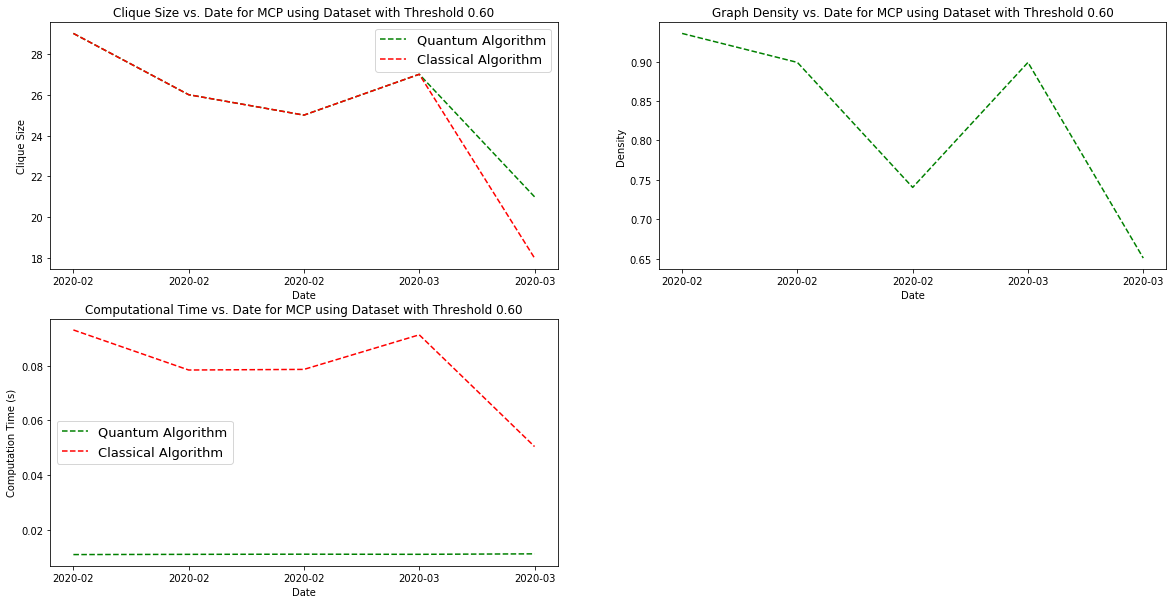

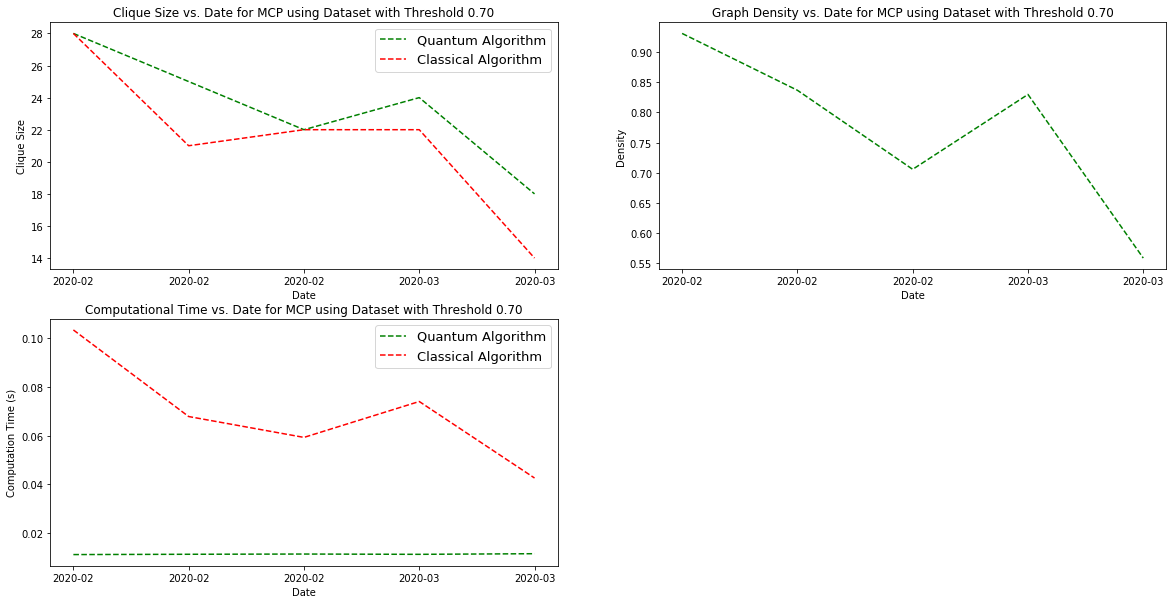

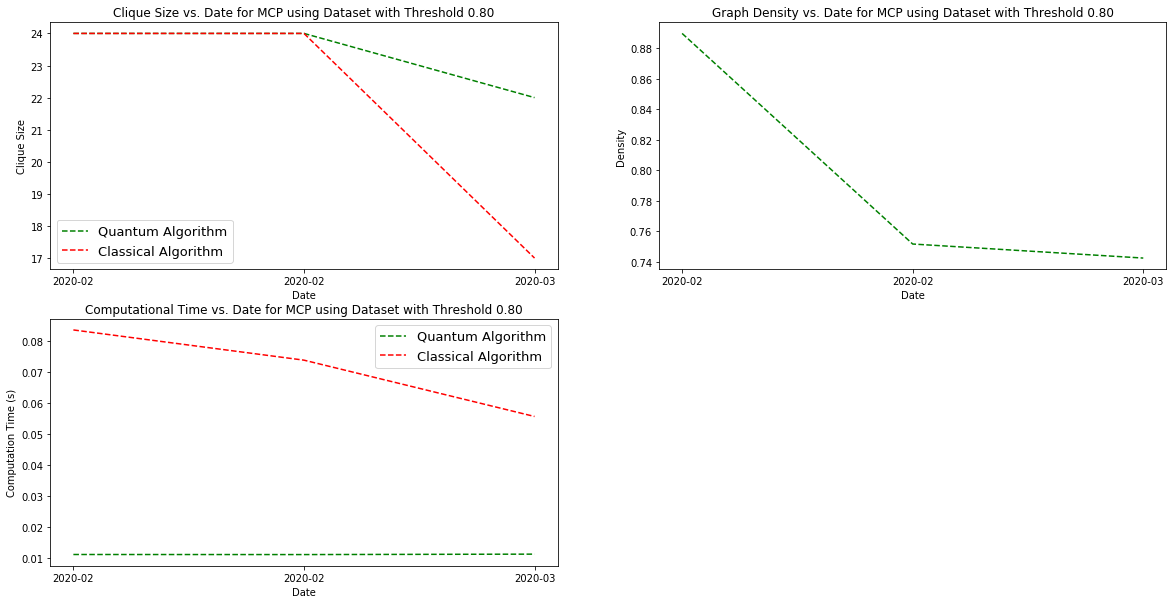

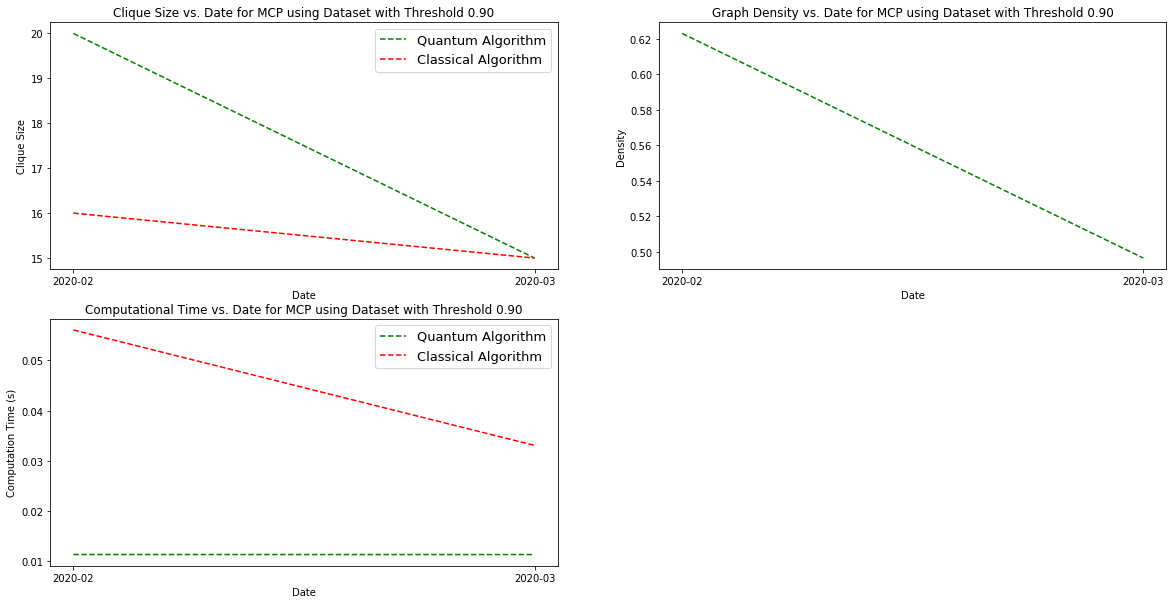

In [62]:
# # Plot score vs time for each threshold
# thresholds = quant_res_df['threshold'].unique()

# i = 1
# for thresh in thresholds:
#     quant_series = quant_res_df[(quant_res_df.threshold == thresh) & 
#                                 (quant_res_df.valid_clique == True)]
#     class_series = class_res_df[(class_res_df.threshold == thresh) & 
#                                 (class_res_df.valid_clique == True)]
# # #     SA_series = SA_res_df[(SA_res_df.threshold == thresh) & 
# #                             (SA_res_df.valid_clique == True)]
    
    
#     class_series = class_series[class_series['date'].isin(quant_series['date'])]
    
    
# #     assert quant_series.shape == class_series.shape == SA_series.shape
#     assert quant_series.shape == class_series.shape 
    
#     fig = plt.figure(i)
#     plt.subplots(figsize=(20,10))
    
#     plt.subplot(221)
#     plt.title('Clique Size vs. Date for MCP using Dataset with Threshold %.2f' % (thresh))
#     plt.ylabel('Clique Size')
#     plt.xlabel('Date')
    
#     plt.plot(quant_series["date"], quant_series['clique_size'], 'g--', label='Quantum Algorithm')
#     plt.plot(quant_series["date"], class_series['clique_size'], 'r--', label='Classical Algorithm')
# #     plt.plot(quant_series["date"], SA_series['clique_size'], 'r--', label='SA Algorithm')
#     plt.legend(loc=0, prop={'size': 13})
#     plt.xticks(ticks=quant_series['date'][::], 
#               labels=[x[0:7] for x in quant_series['date']])
#     plt.savefig('Clique_size plot with ' + str(thresh)+ '.pdf')
    
    
#     plt.subplot(222)
#     plt.title('Graph Density vs. Date for MCP using Dataset with Threshold %.2f' % (thresh))
#     plt.plot(quant_series['date'], quant_series['density'], 'g--')
# #     plt.plot(quant_series['date'], class_series['density'], 'r--')
# #     plt.legend(loc=0, prop={'size': 13})
#     plt.xticks(ticks=quant_series['date'][::], 
#               labels=[x[0:7] for x in quant_series['date']])
#     plt.ylabel("Density")
#     plt.xlabel("Date")
#     plt.savefig('Graph Density plot with ' + str(thresh)+ '.pdf')
    
    
    
#     plt.subplot(223)
#     plt.title('Computational Time vs. Date for MCP using Dataset with Threshold %.2f' % (thresh))
#     plt.ylabel('Computation Time (s)')
#     plt.xlabel('Date')
    
#     plt.plot(quant_series["date"], quant_series['computation_time'], 'g--', label='Quantum Algorithm')
#     plt.plot(quant_series["date"], class_series['computation_time'], 'r--', label='Classical Algorithm')
# #     plt.plot(quant_series["date"], SA_series['computation_time'], 'r--', label='SA Algorithm')
    
#     plt.legend(loc=0, prop={'size': 13})
#     plt.xticks(ticks=quant_series['date'][::], 
#               labels=[x[0:7] for x in quant_series['date']])
#     plt.savefig('Computational Time vs. Date plot with ' + str(thresh) + '.pdf')
    
#     i += 1

#  Plot Computational Time vs Density

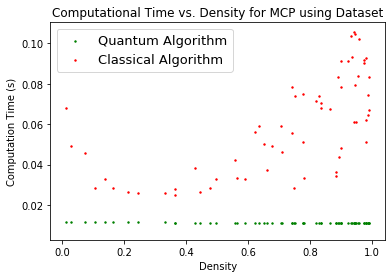

In [33]:
plt.title('Computational Time vs. Density for MCP using Dataset')
plt.ylabel('Computation Time (s)')
plt.xlabel('Density')

plt.scatter(quant_res_df["density"], quant_res_df['computation_time'], c='g', s=2, label='Quantum Algorithm')
plt.scatter(class_res_df["density"], class_res_df['computation_time'], c='r', s=2, label='Classical Algorithm')
plt.legend(loc=0, prop={'size': 13})

plt.savefig('Computational Time vs Density for MCP.pdf')
    

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
dates_formatted = [pd.to_datetime(d) for d in quant_res_df['date']]
x = list(range(len(quant_res_df['date'])))

fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, quant_res_df['density'], quant_res_df['computation_time'])
ax.xaxis.set_ticks(x)
ax.xaxis.set_ticklabels(dates_formatted)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 10
ax.set_zlabel('Computation Time (s)')

plt.locator_params(axis='x', nbins=10)
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Density')
plt.show()